# Import dataset, definizione funzioni e costanti

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import calendar
from datetime import datetime, timedelta
from calendar import monthrange
import locale

In [2]:
locale.setlocale(locale.LC_TIME, 'it_IT')

'it_IT'

In [3]:
plot_base_path = "Plot"

dataset_training_path = os.path.join("..", "Preprocessing", "Dataset", "dataset_training.csv")
df_training = pd.read_csv(dataset_training_path, index_col="Timestamp")
df_training.index = pd.to_datetime(df_training.index)

dataset_plot_path = os.path.join("..", "Preprocessing", "Dataset", "dataset_plot.csv")
df_plot = pd.read_csv(dataset_plot_path, index_col="Timestamp")
df_plot.index = pd.to_datetime(df_plot.index)

In [4]:
counter = 0
def make_path(base_path, file_name):
    global counter
    counter += 1
    file_name = str(counter) + "-" + file_name  
    return os.path.join(base_path, file_name)

# Analisi minimi, massimi, media e deviazione standard

In [5]:
df_training.describe().round(decimals=2)

Carico totale  Temperatura  Giorno della settimana      Mese    Giorno  \
count       18264.00     18264.00                 18264.0  18264.00  18264.00   
mean         4619.23        16.84                     3.0      6.46     15.73   
std          1389.31         8.34                     2.0      3.39      8.80   
min          2584.72        -0.85                     0.0      1.00      1.00   
25%          3699.80        10.39                     1.0      4.00      8.00   
50%          4177.24        15.87                     3.0      6.00     16.00   
75%          5082.36        22.01                     5.0      9.00     23.00   
max         11613.04        42.50                     6.0     12.00     31.00   

            Ora   Festivo  
count  18264.00  18264.00  
mean      11.50      0.05  
std        6.92      0.22  
min        0.00      0.00  
25%        5.75      0.00  
50%       11.50      0.00  
75%       17.25      0.00  
max       23.00      1.00

# Distribuzione valori

In [ ]:
df_weekday = df_training[df_training.index.weekday < 5]
df_weekend = df_training[df_training.index.weekday >= 5]

counter = 0
fields = ["Carico totale"]

for field in fields:
    plt.figure(figsize=(10,5)) 
    
    title = "BoxPlot carico " + field + " totale giorni della settimana - fine settimana"
    plt.title(title)
    plt.ylabel("W")

    data_for_plot = [df_weekday[field], df_weekend[field]]
    sns.boxplot(data=data_for_plot)

    plt.xticks([0,1], [field+" giorni lavorativi", field+" fine settimana"])

    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_base_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)

    plt.show()

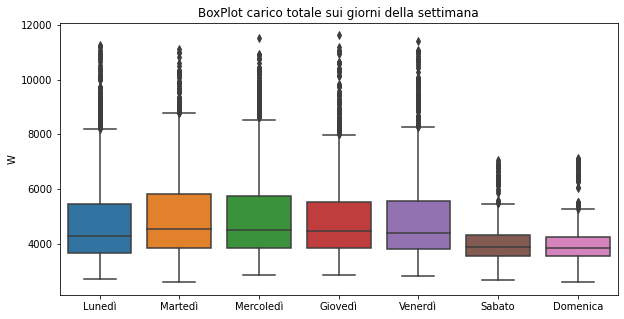

In [7]:
counter = 0
fields = ["Carico totale"]

for field in fields:
    plt.figure(figsize=(10,5)) 

    title = "BoxPlot carico totale sui giorni della settimana"
    plt.title(title)
    plt.ylabel("W")

    data_for_plot = [df_training[df_training.index.weekday == i][field] for i in range(0,7)]
    sns.boxplot(data=data_for_plot)

    plt.xticks([0,1,2,3,4,5,6], ["Lunedì", "Martedì", "Mercoledì", "Giovedì", "Venerdì", "Sabato", "Domenica"])

    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_base_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)

    plt.show()

# Plot curve di carico linee L1, L2 e L3

In [20]:
def plot_distribution(df, fields, start_point, end_point, dim, title, xlabel, ylabel, base_path):
    
    df_tmp = df.loc[start_point:end_point]
    
    plt.figure(figsize=dim) 
    plt.grid()
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    for field in fields:
        plt.plot(df_tmp.index, df_tmp[field], marker='o', markersize="3", linewidth="2.5", label=field, color="black")
    
    plt.xticks(rotation=45)
    
    plt.legend()
    
    file_name = "".join(title.lower()).replace(" ", "_")
    file_name = file_name.replace(":", "_")
    path = make_path(base_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)
    plt.show()

In [9]:
def plot_distribution_load(df, fields, path):
    
    start_date = df.index.min()
    end_date = df.index.max()
    
    current_date = start_date
    while current_date <= end_date:
        month_start = current_date.replace(day=1, hour=0)
        month_end = current_date.replace(day=monthrange(current_date.year, current_date.month)[1], hour=23)
        
        title = "Curva di carico " + month_start.strftime('%B') + " " + str(month_start.year)
        xlabel = "Tempo"
        ylabel = "W"
        dim = (30,10)
        plot_distribution(df, fields, month_start, month_end, dim, title, xlabel, ylabel, path)
        
        current_date = current_date.replace(day=1) + timedelta(days=32)

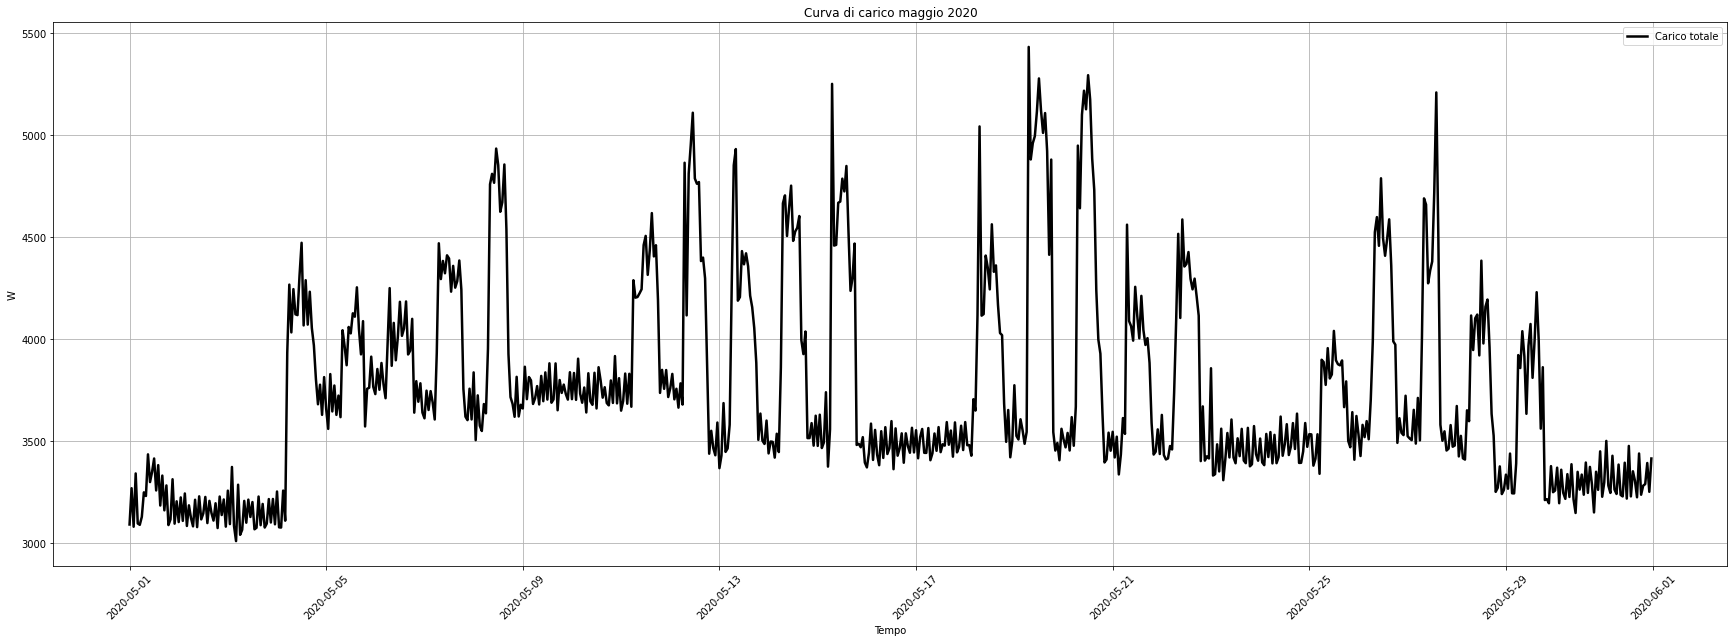

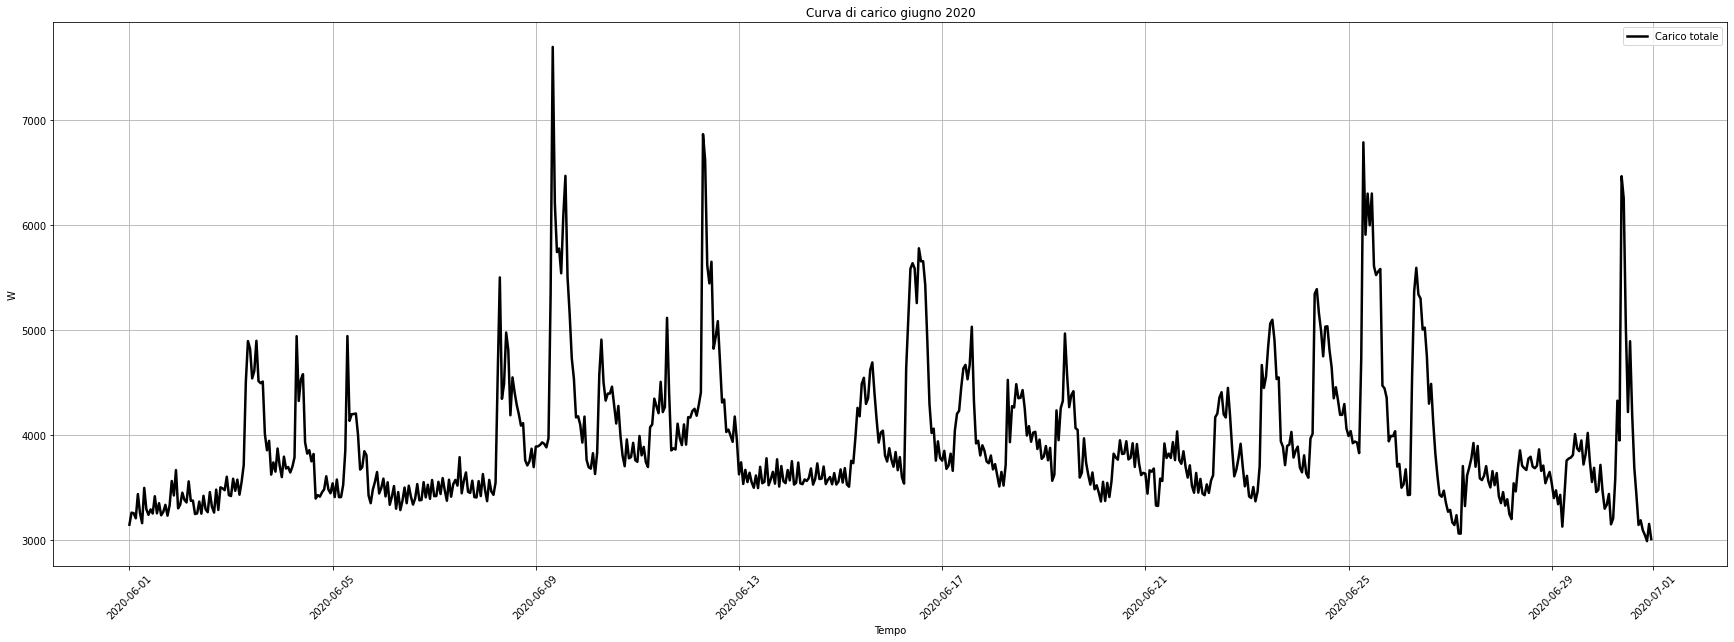

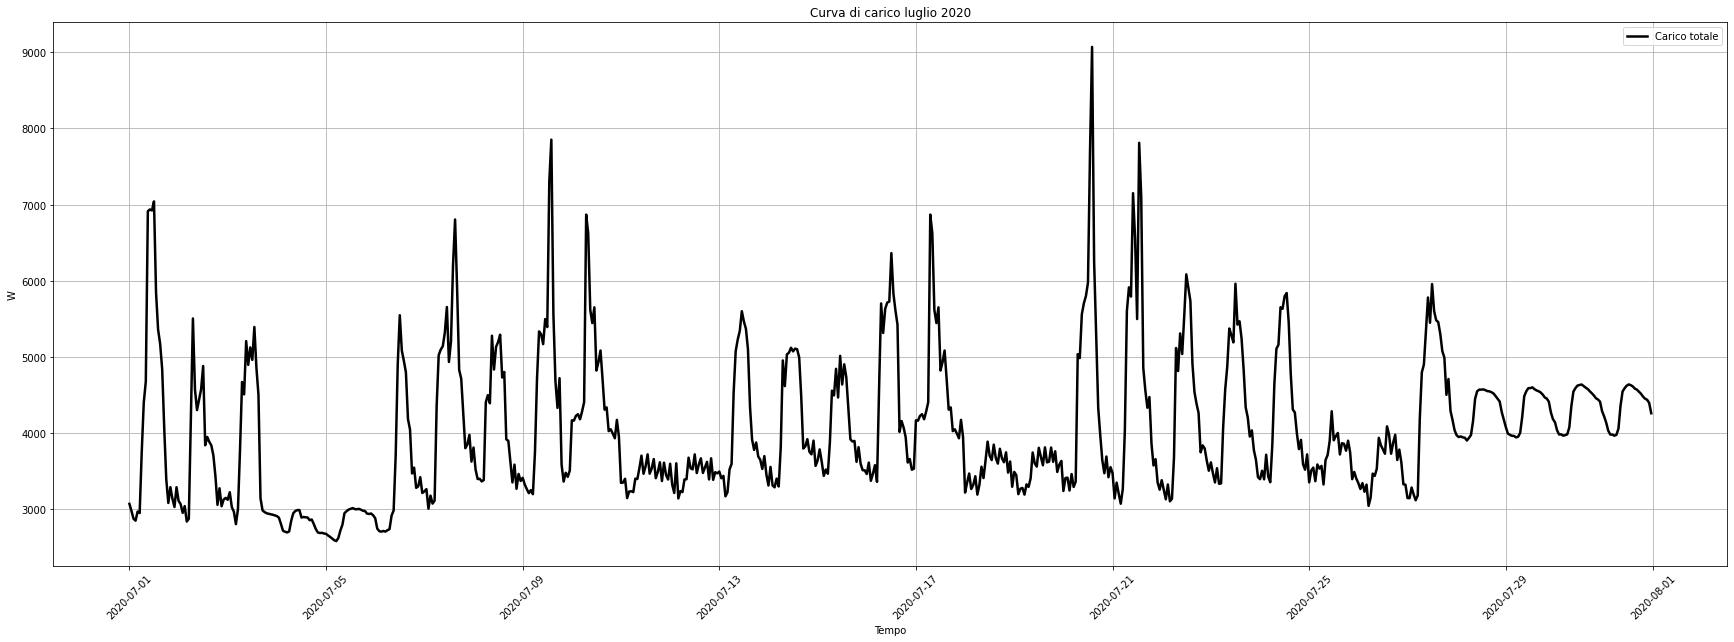

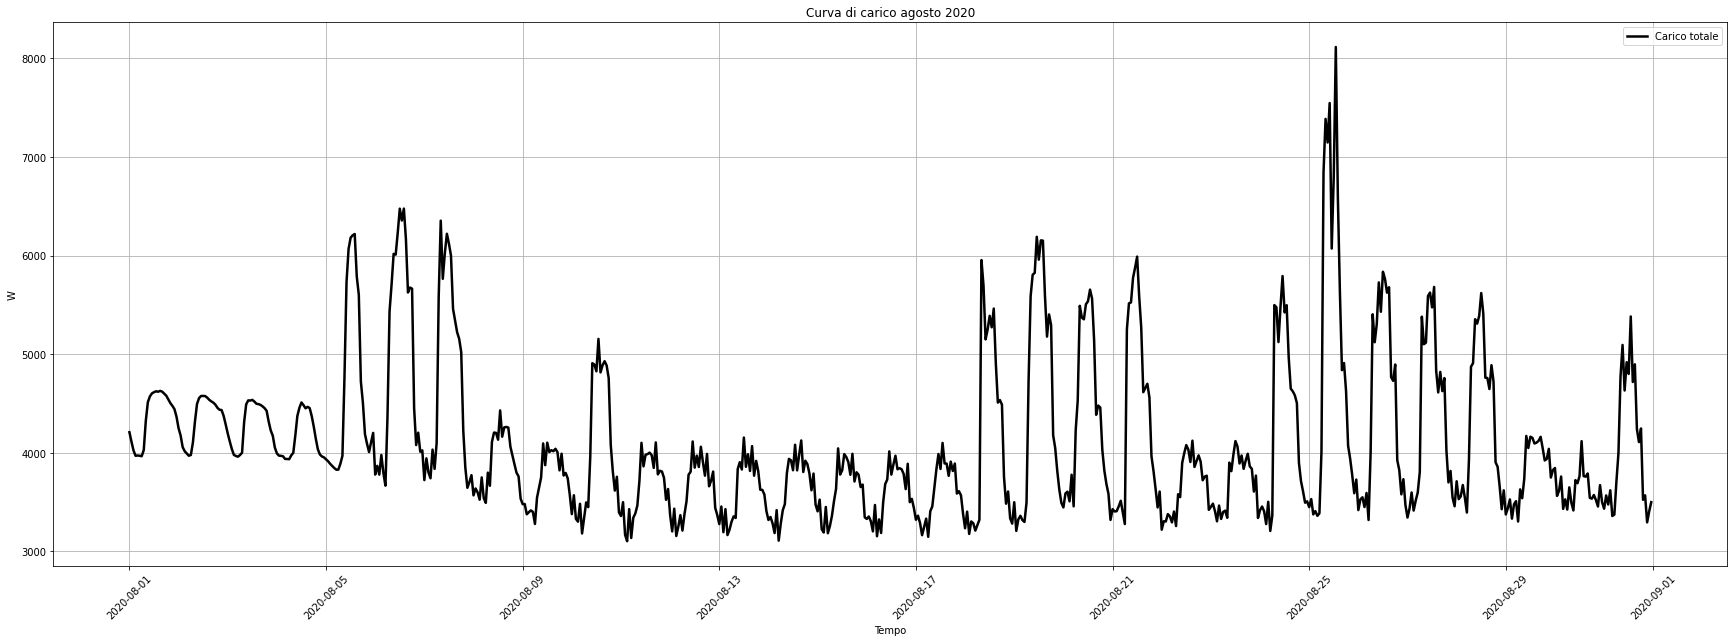

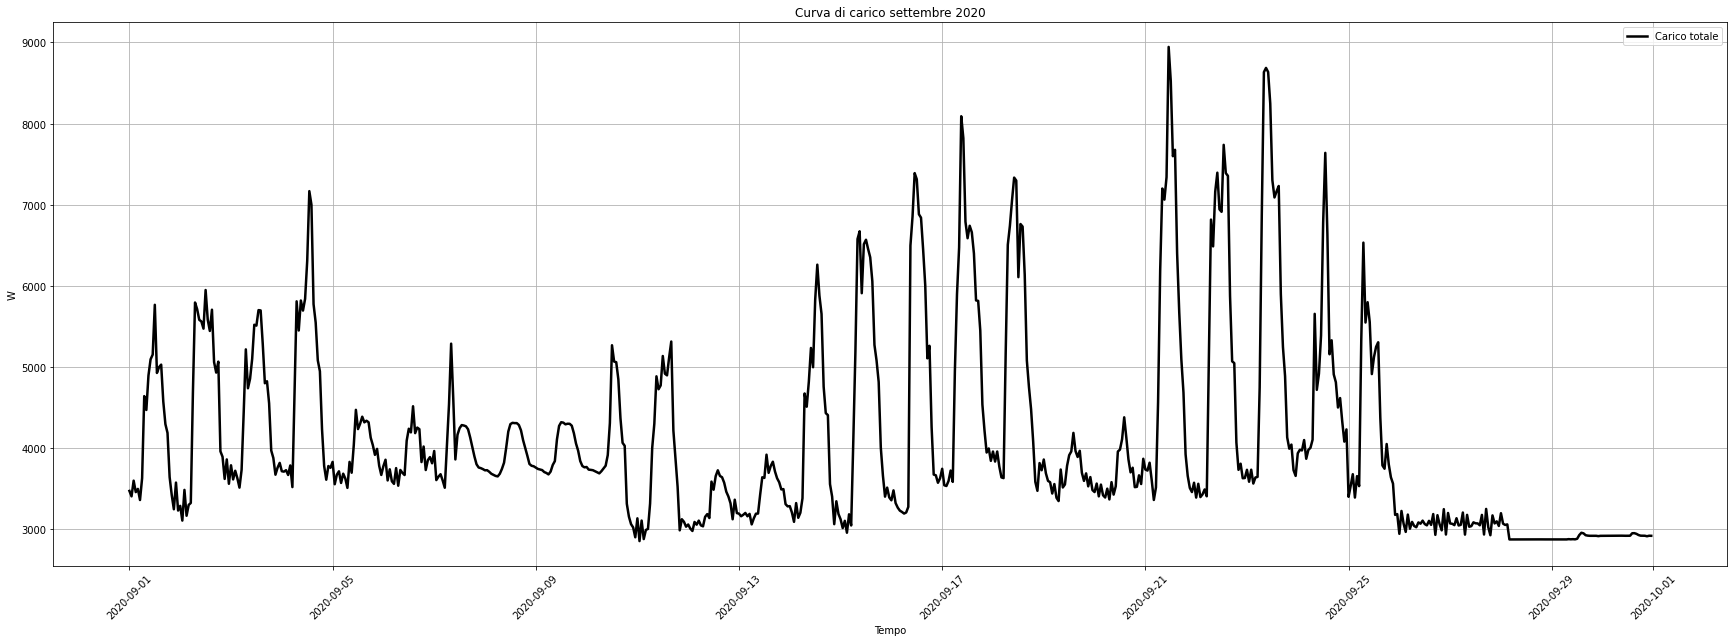

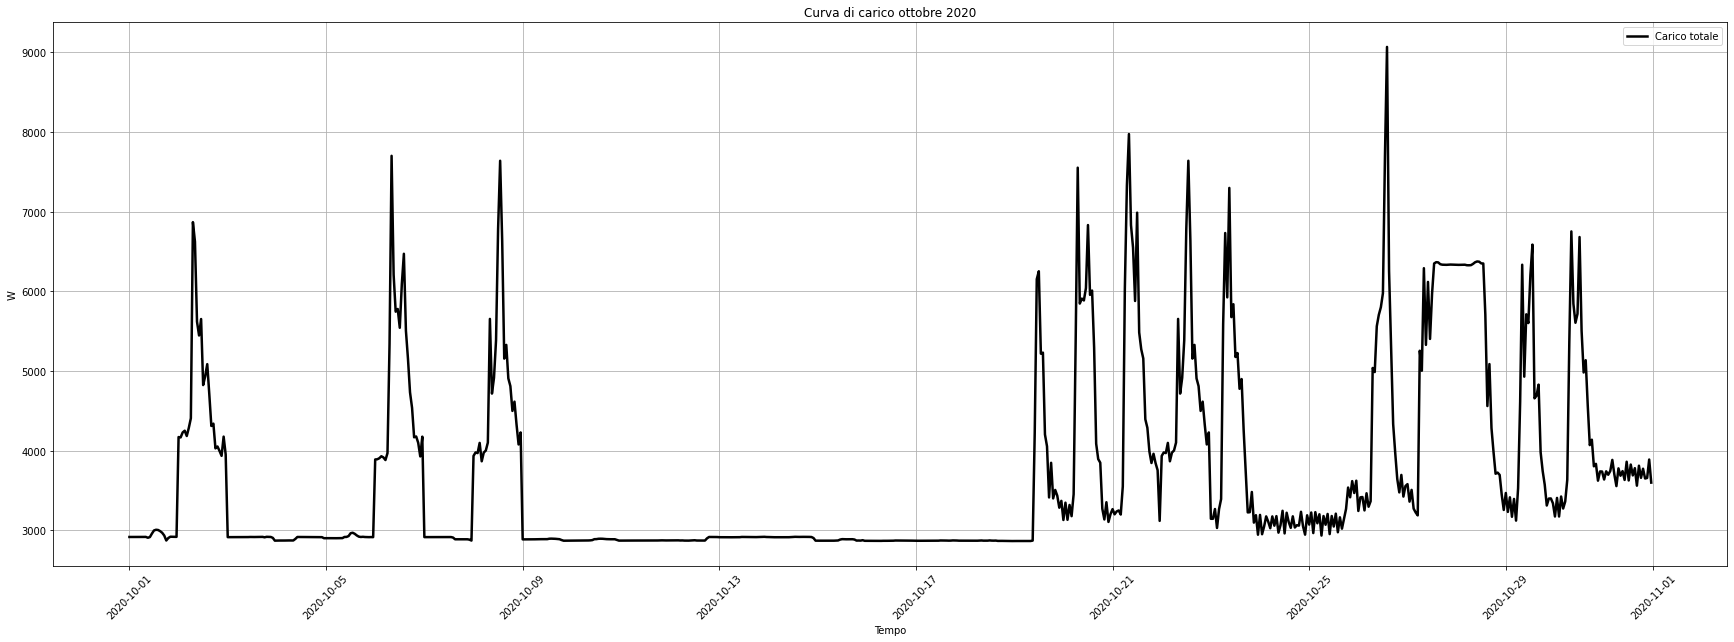

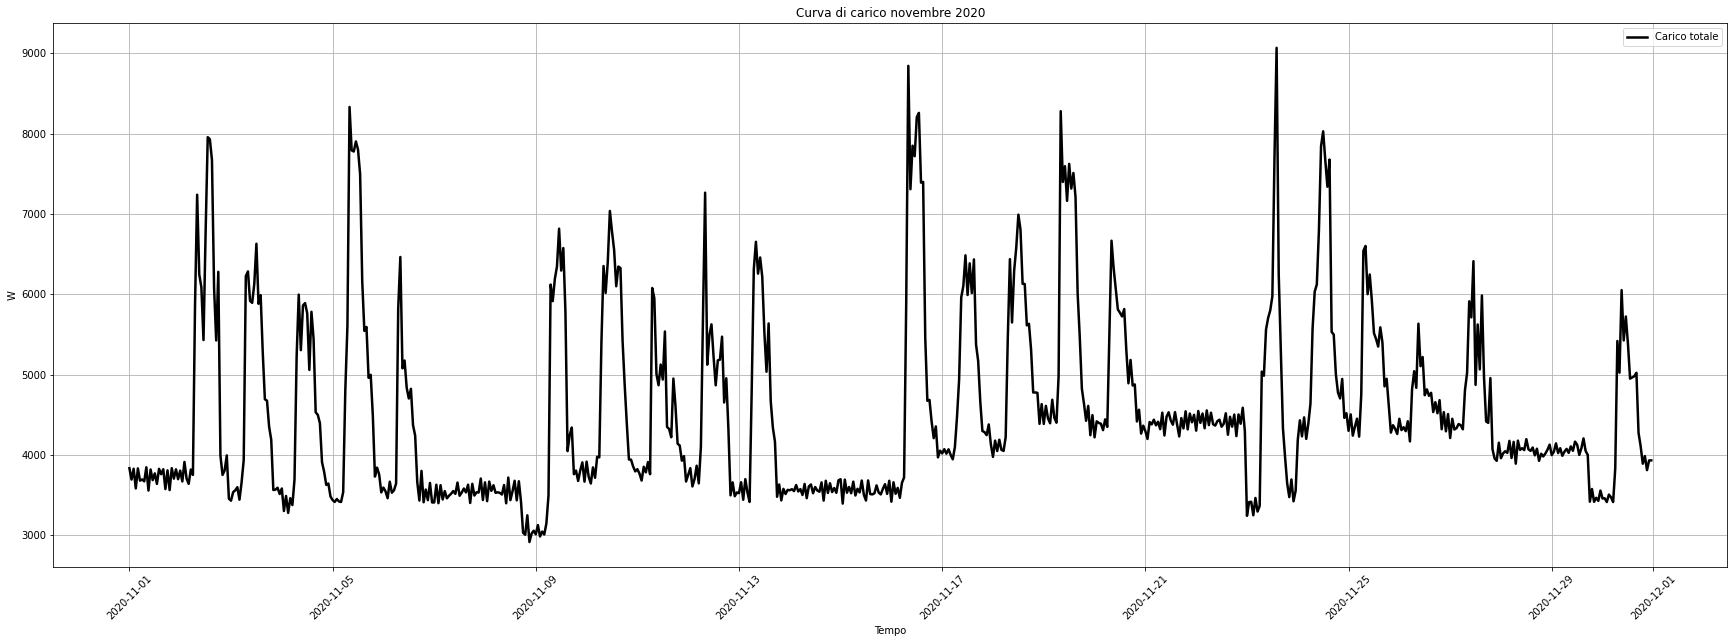

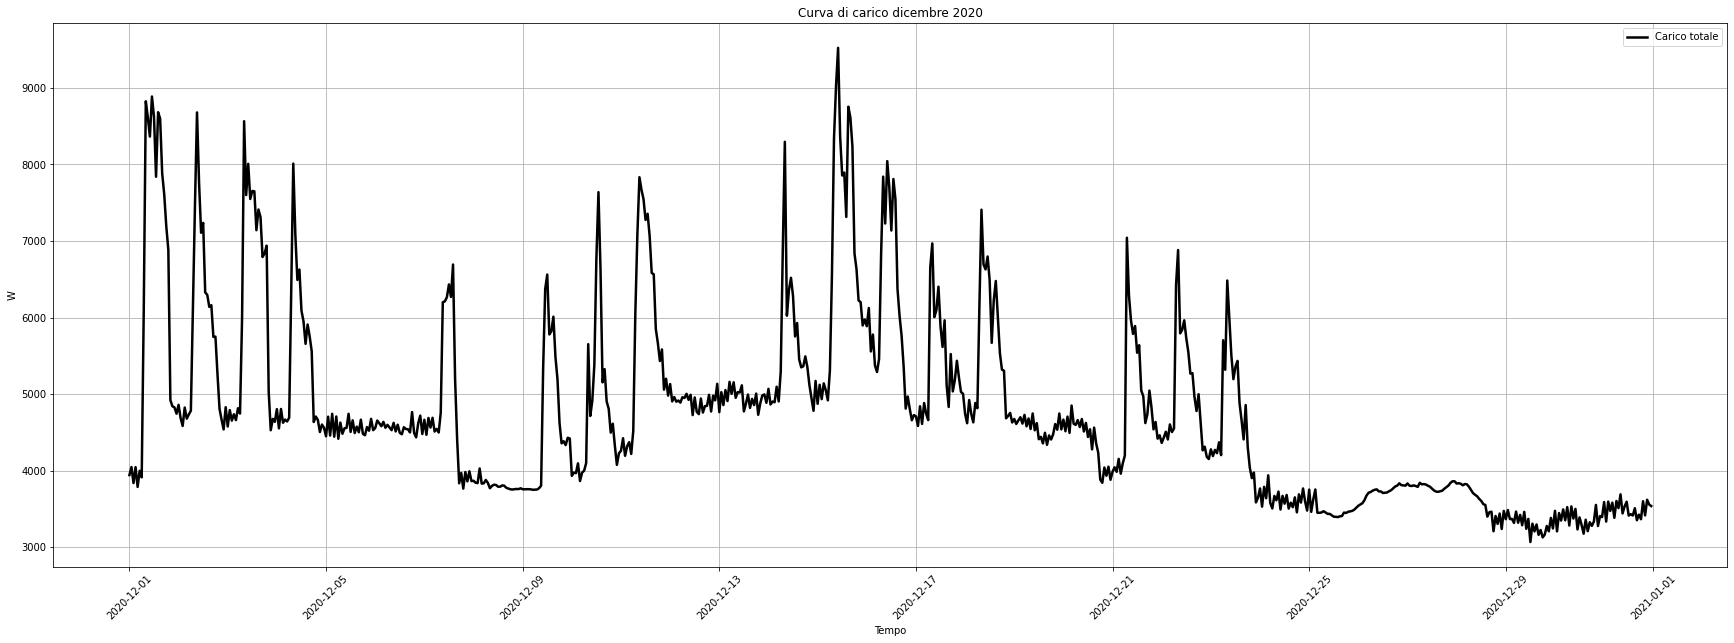

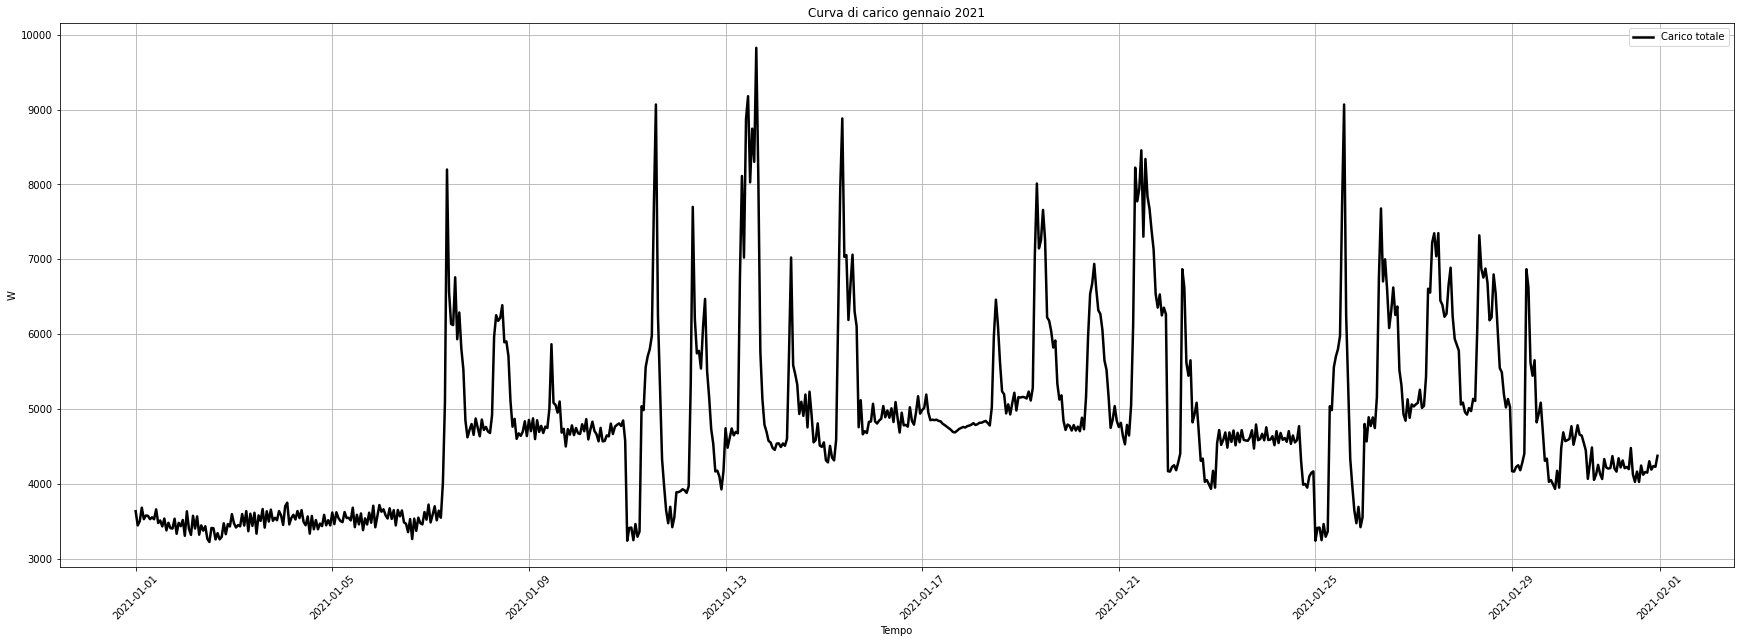

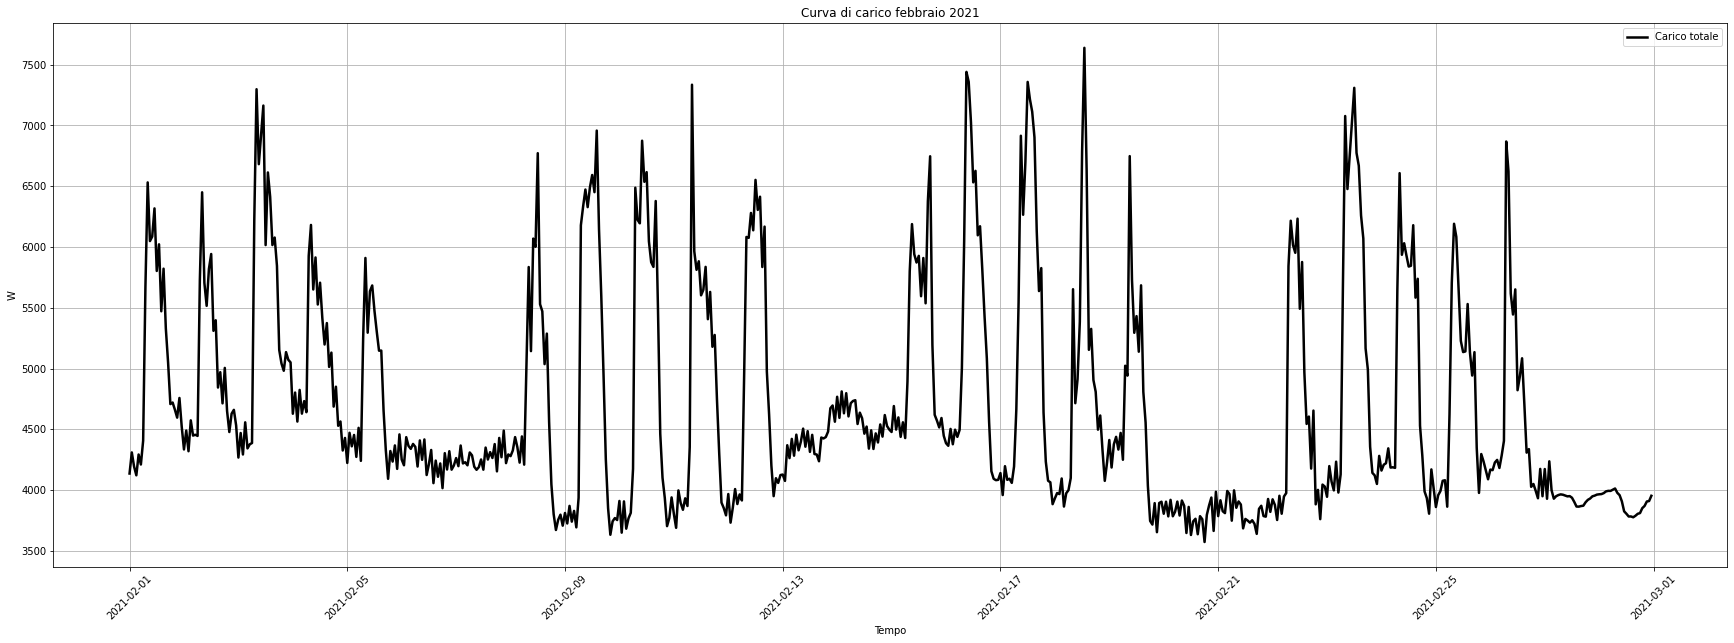

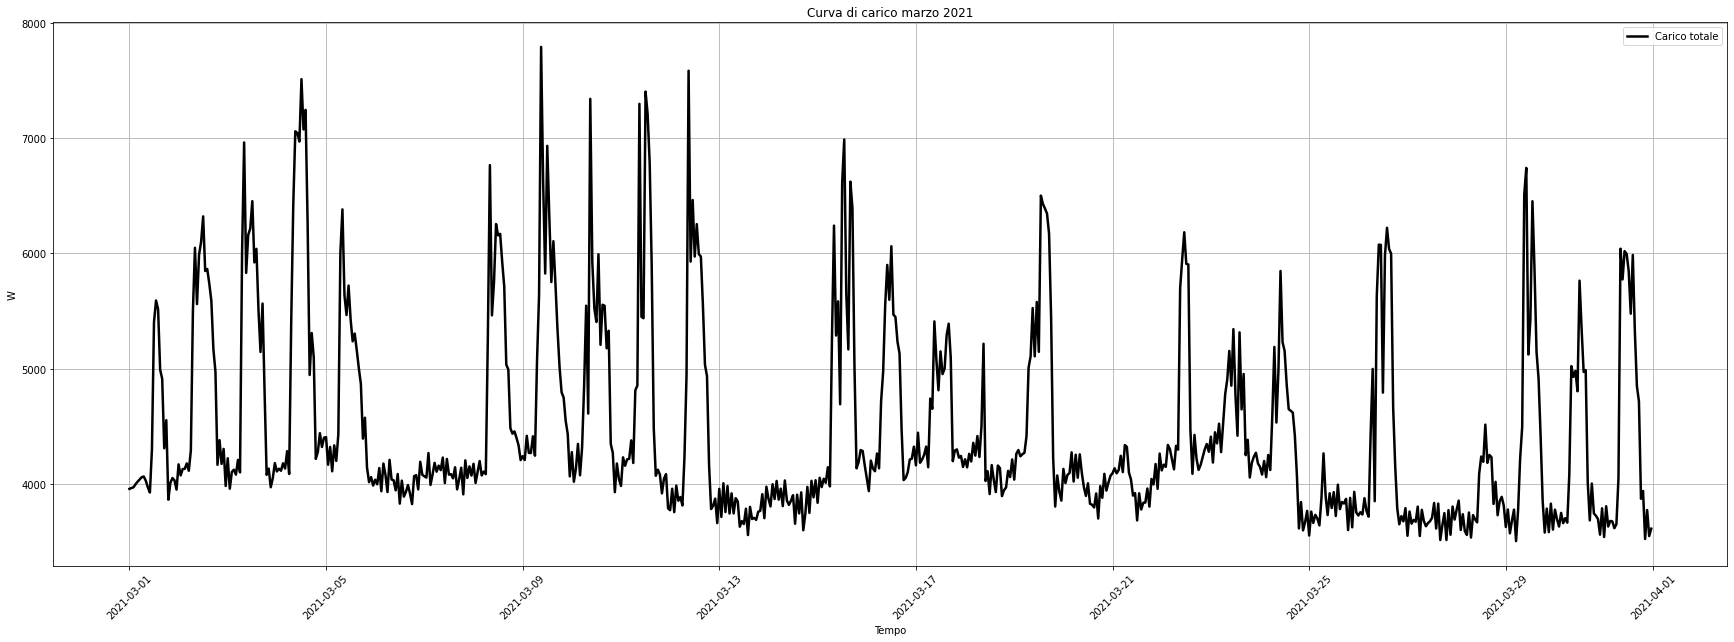

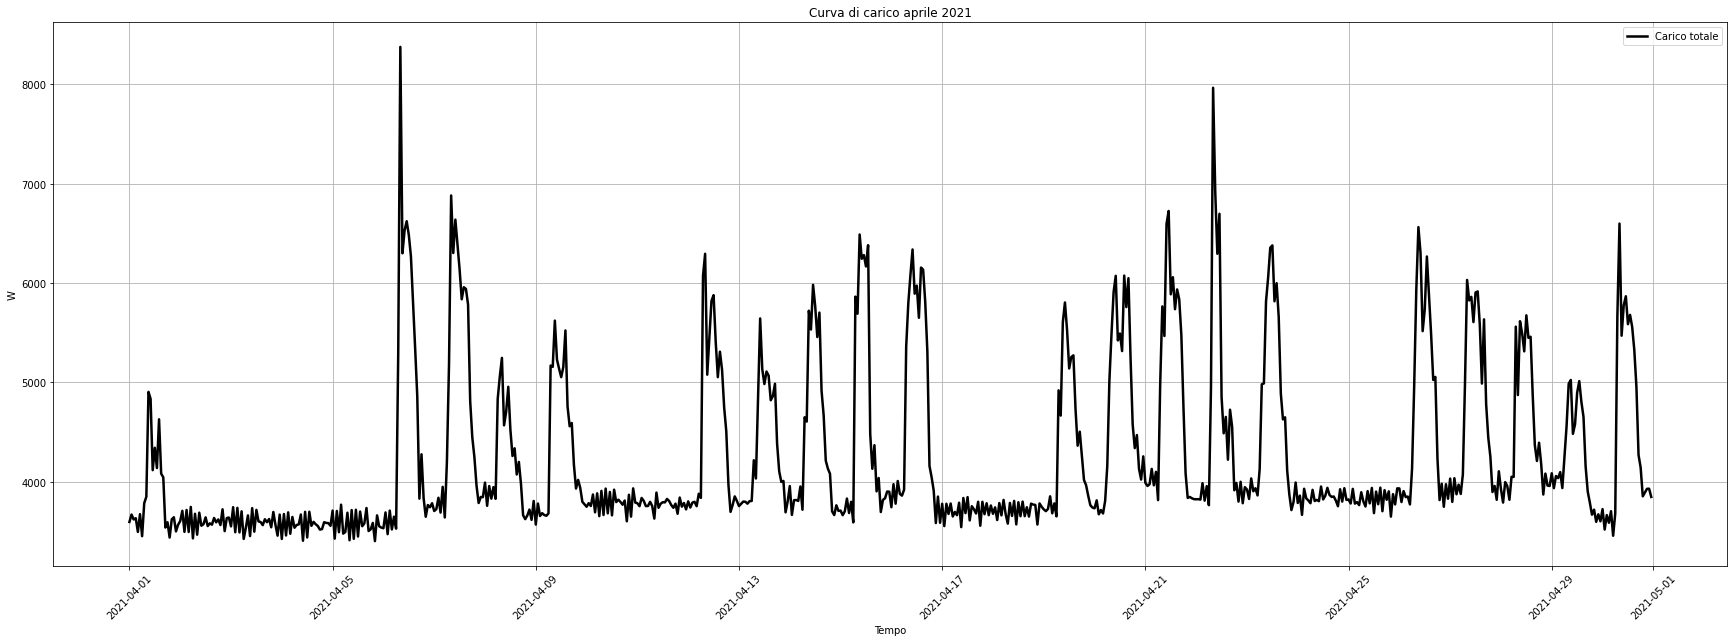

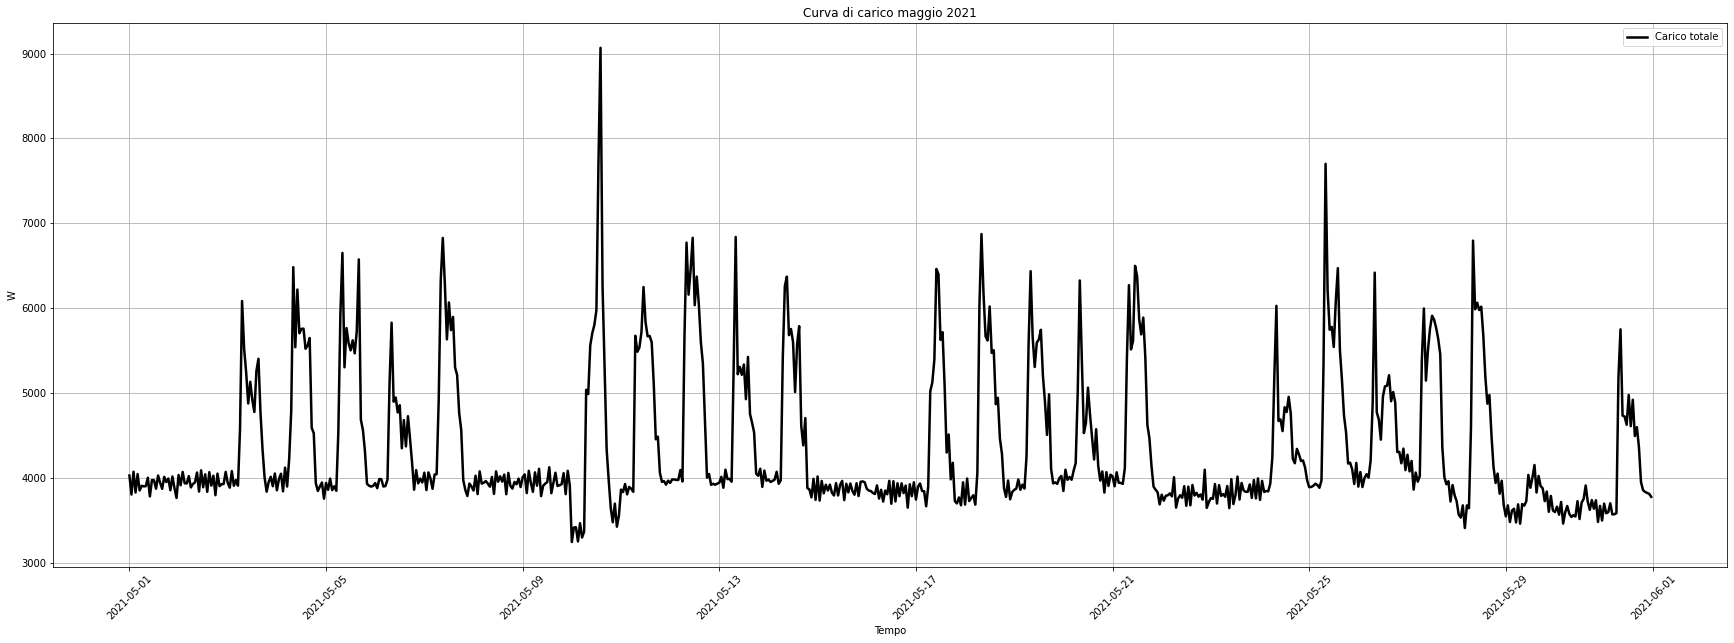

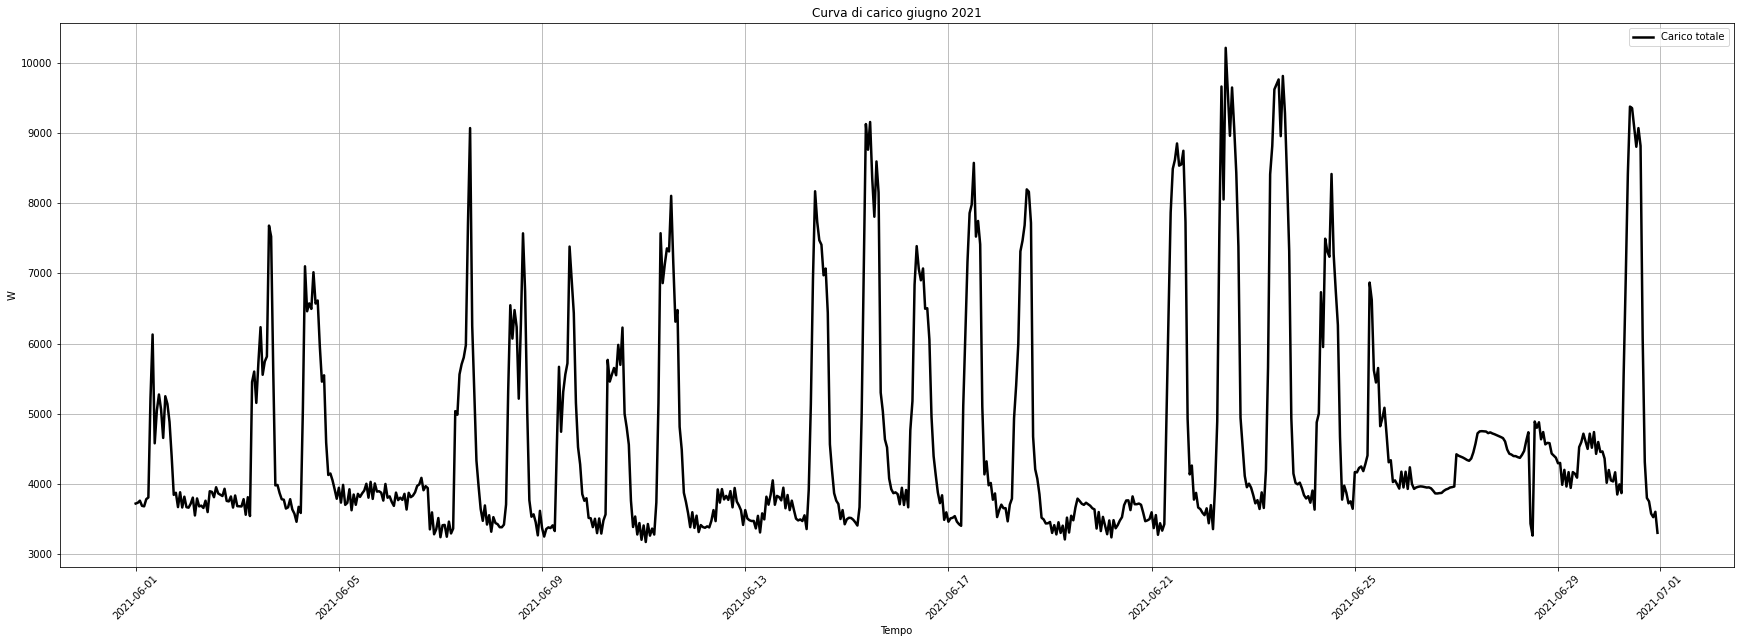

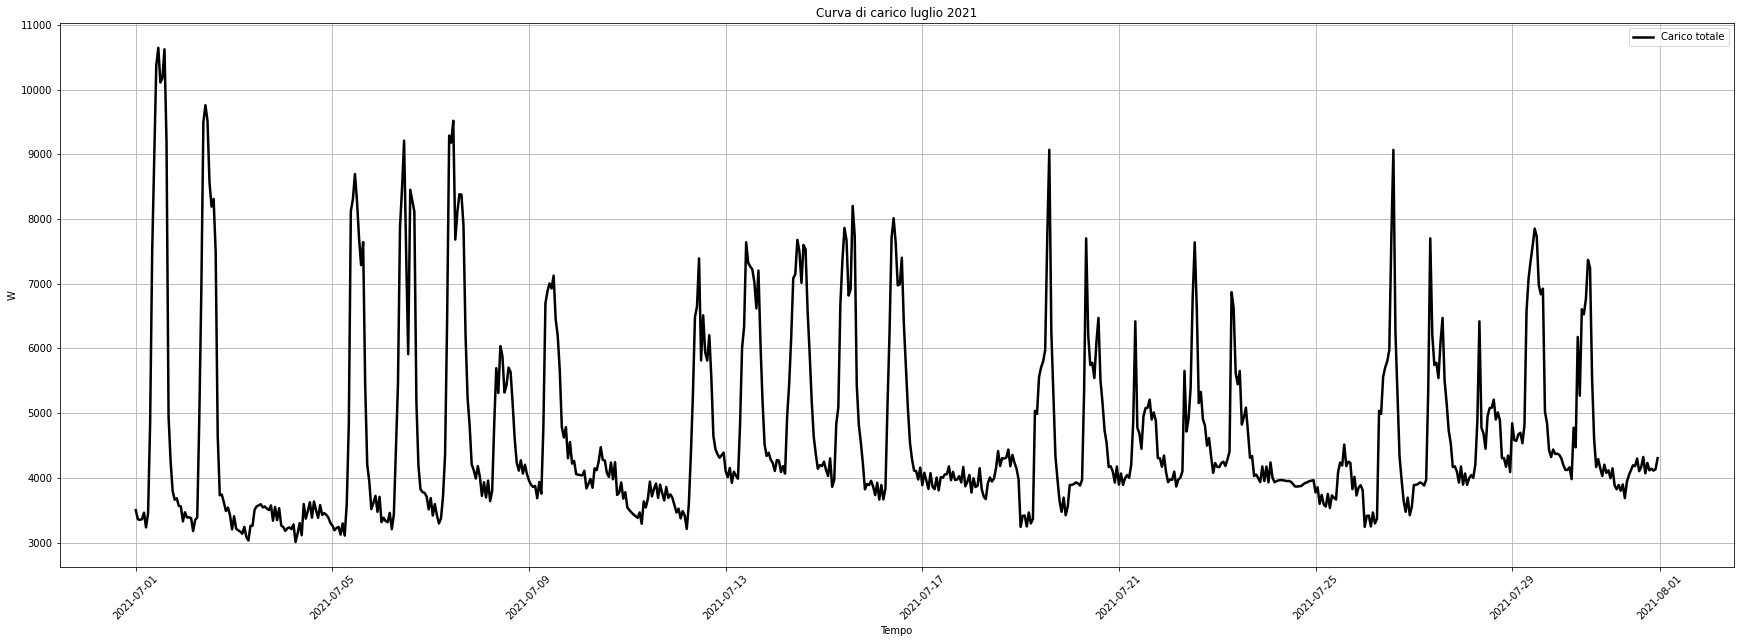

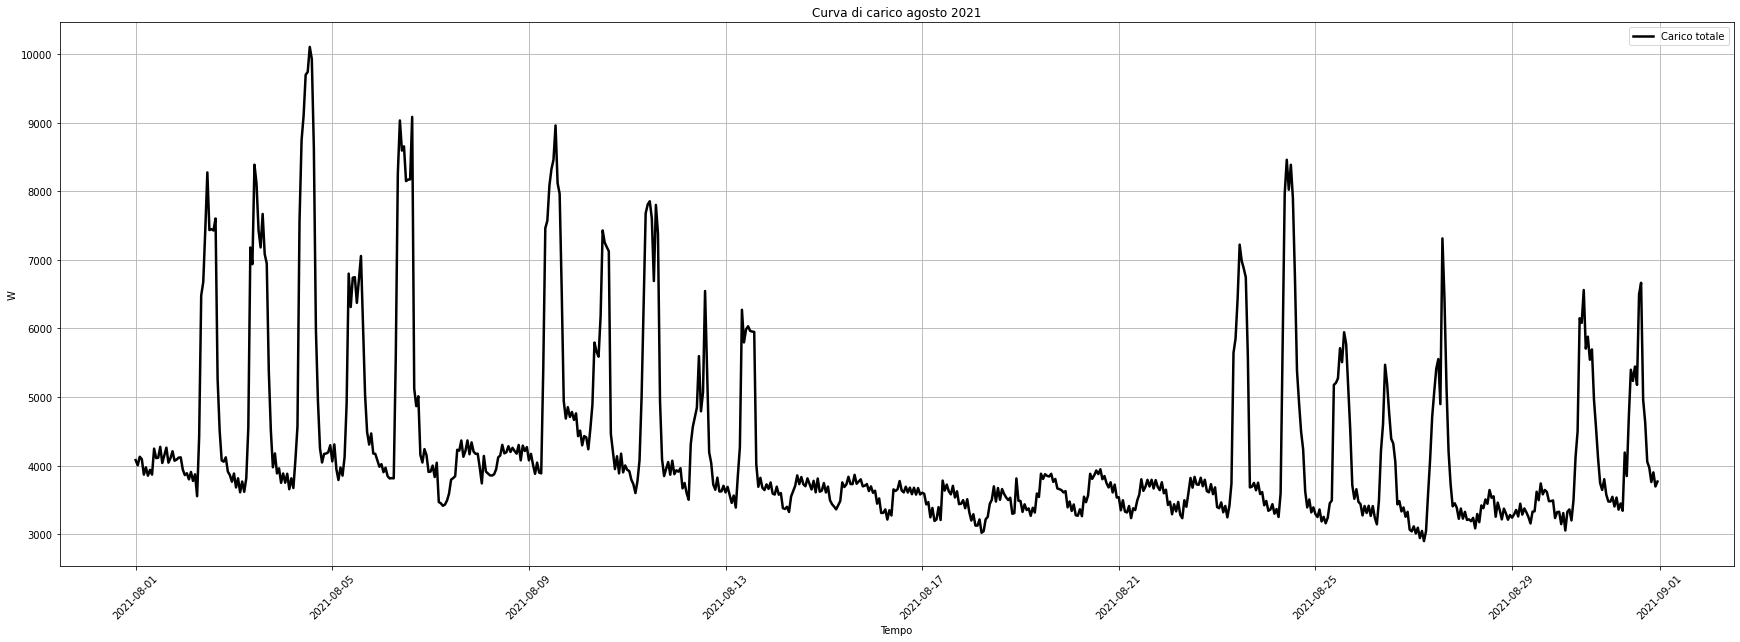

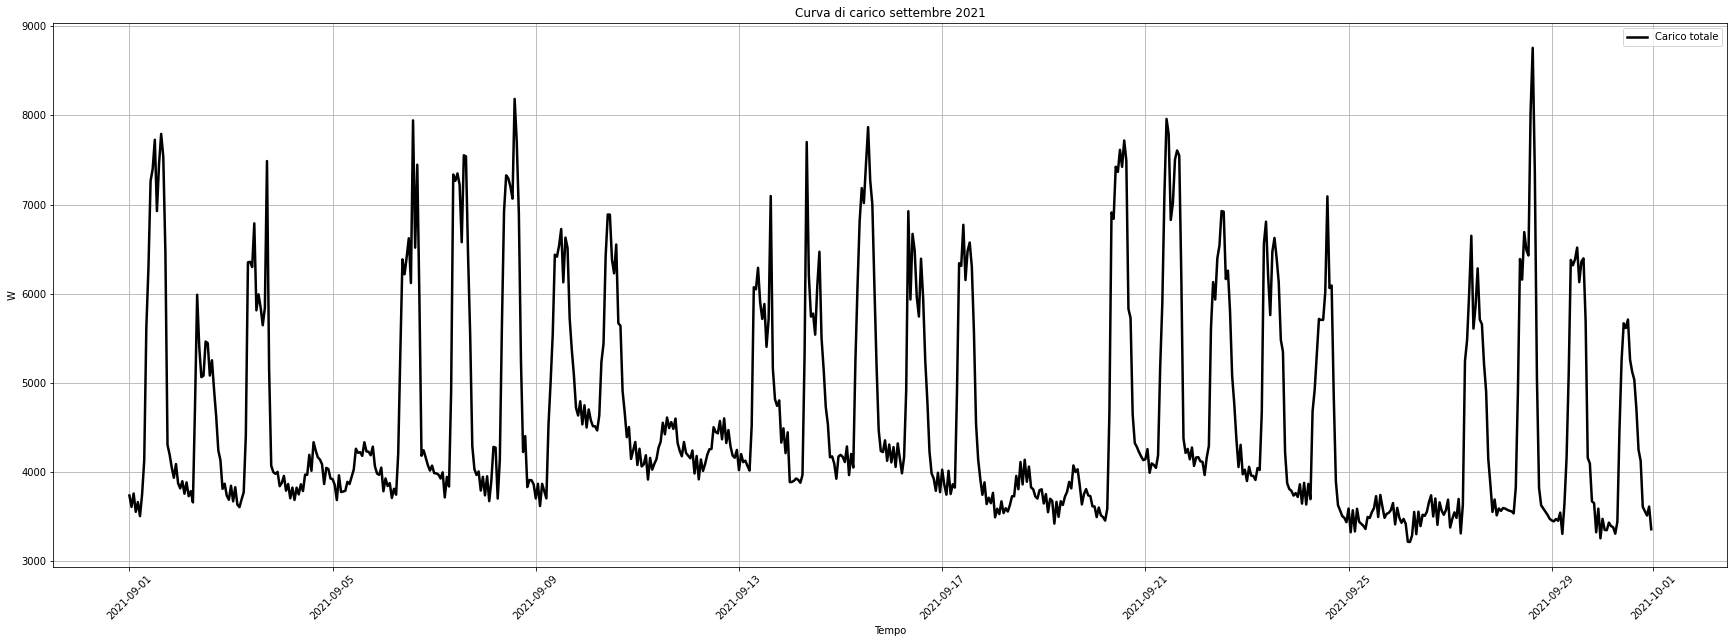

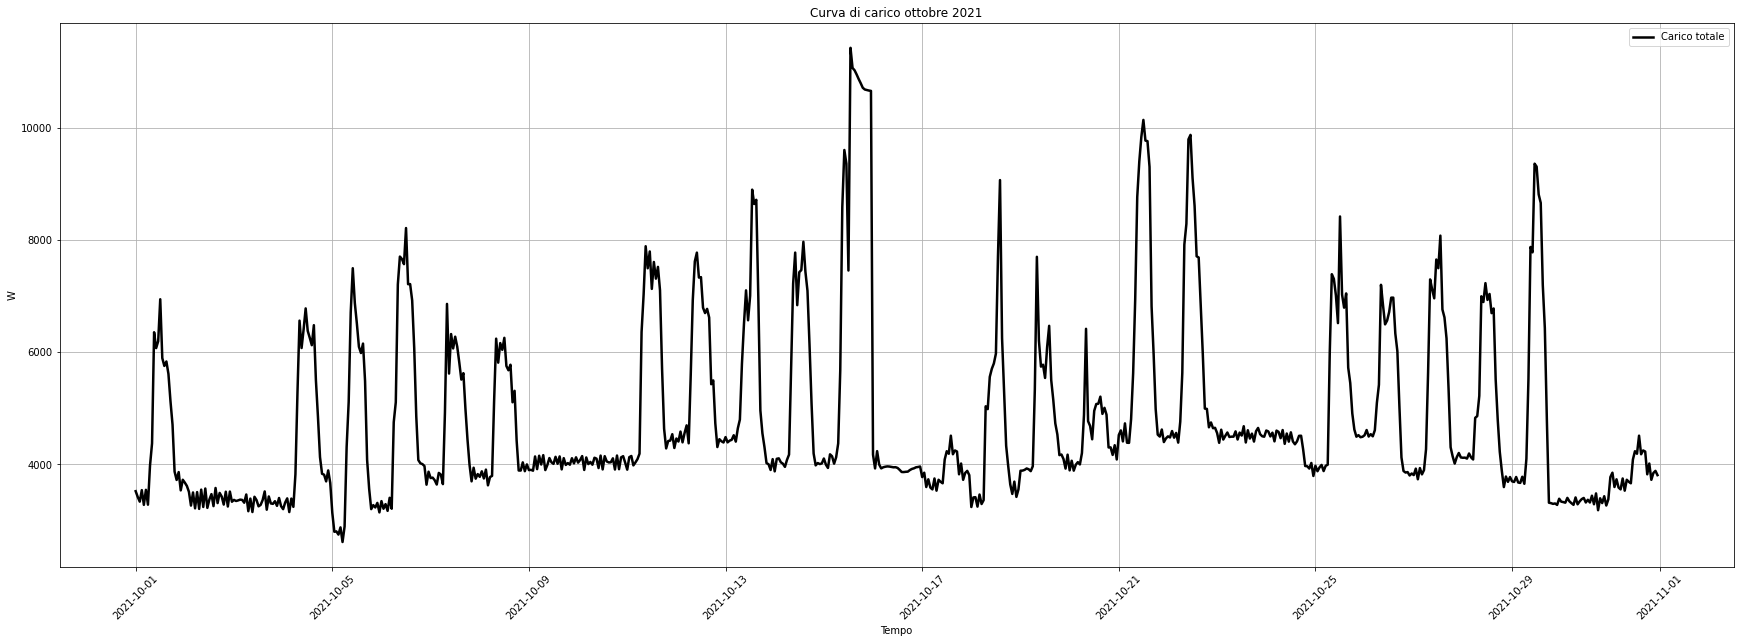

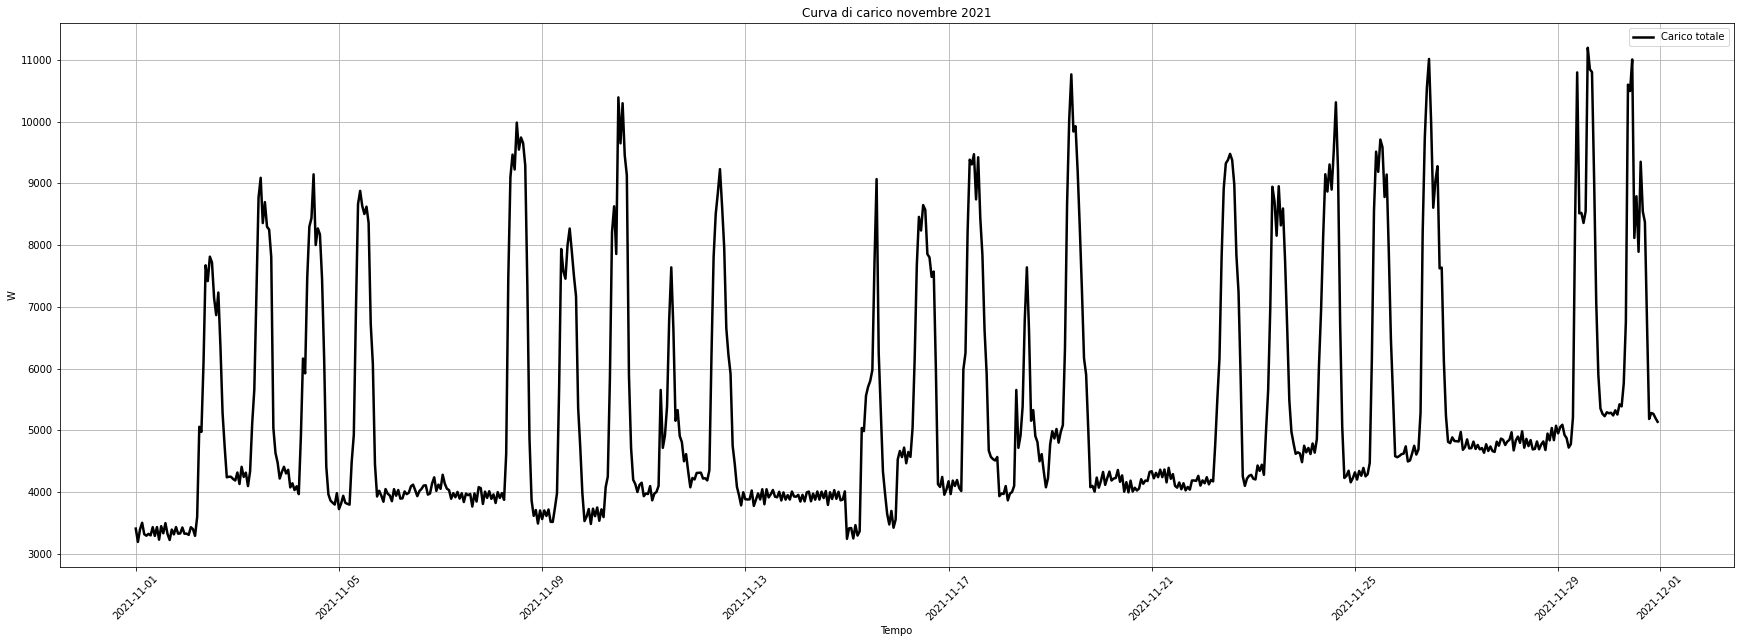

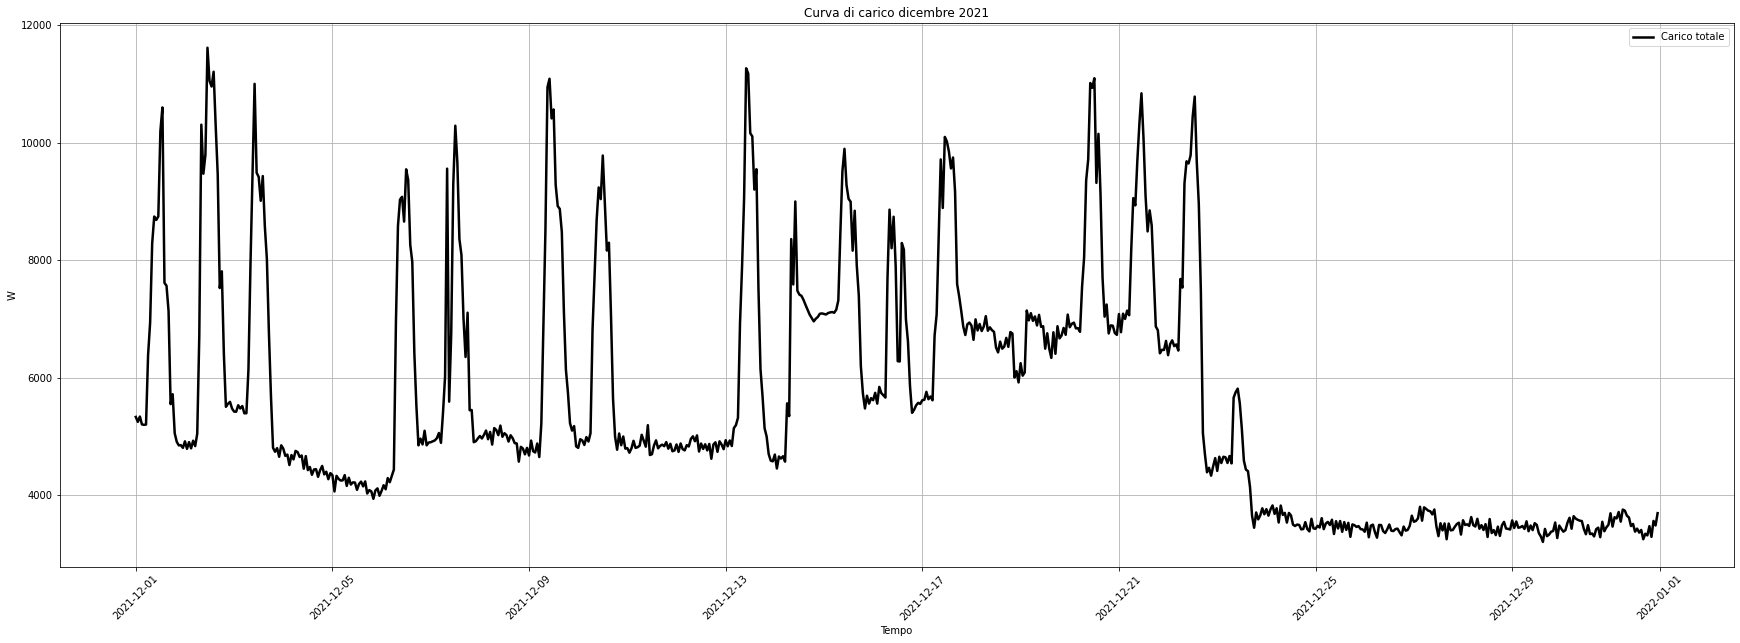

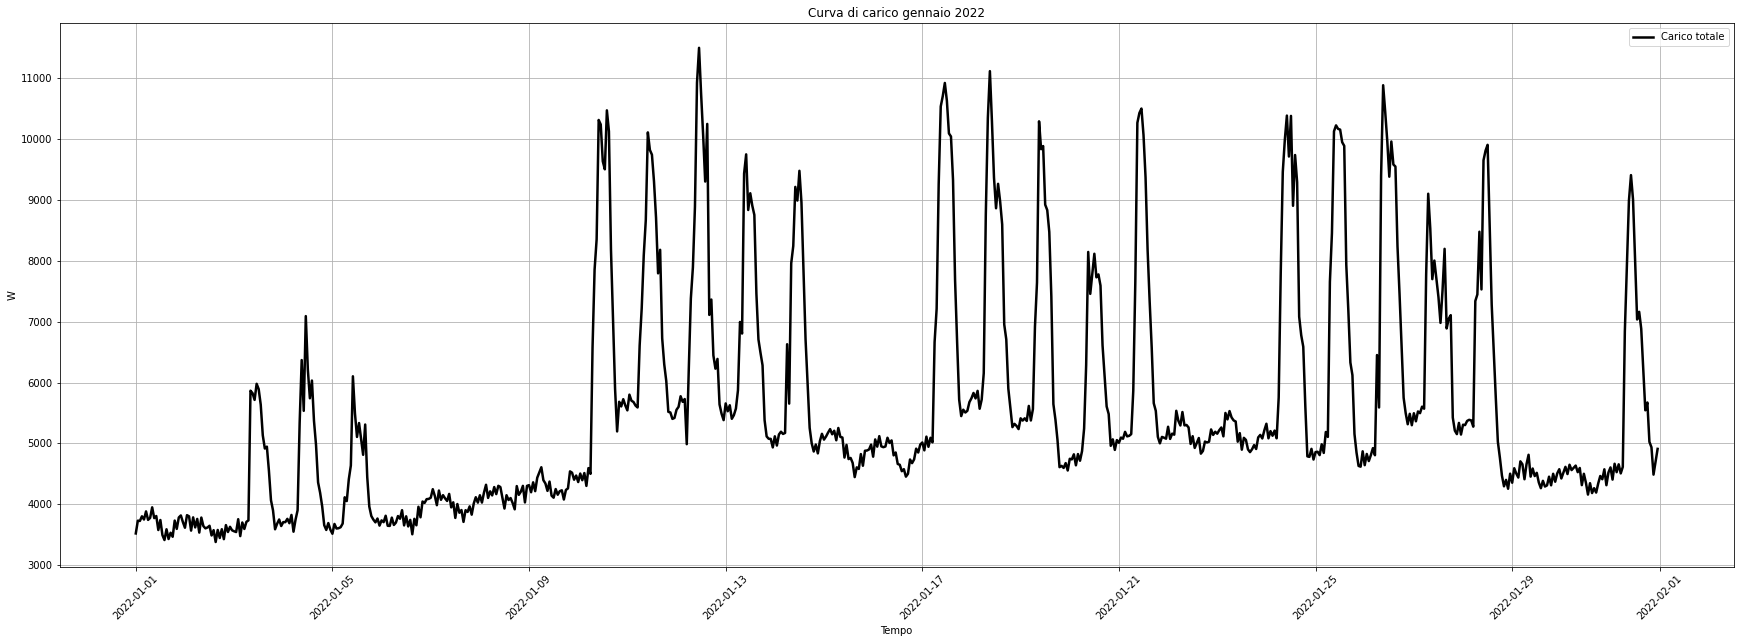

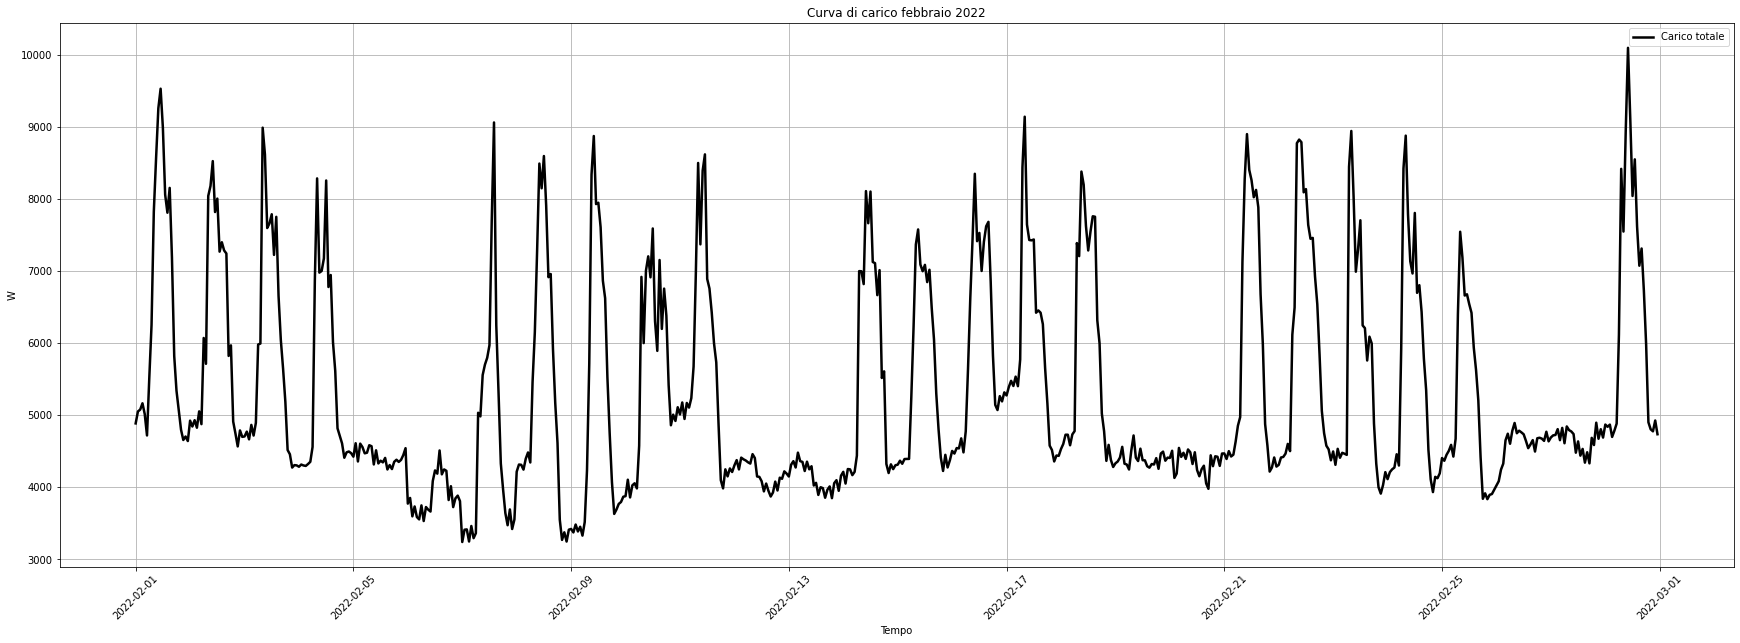

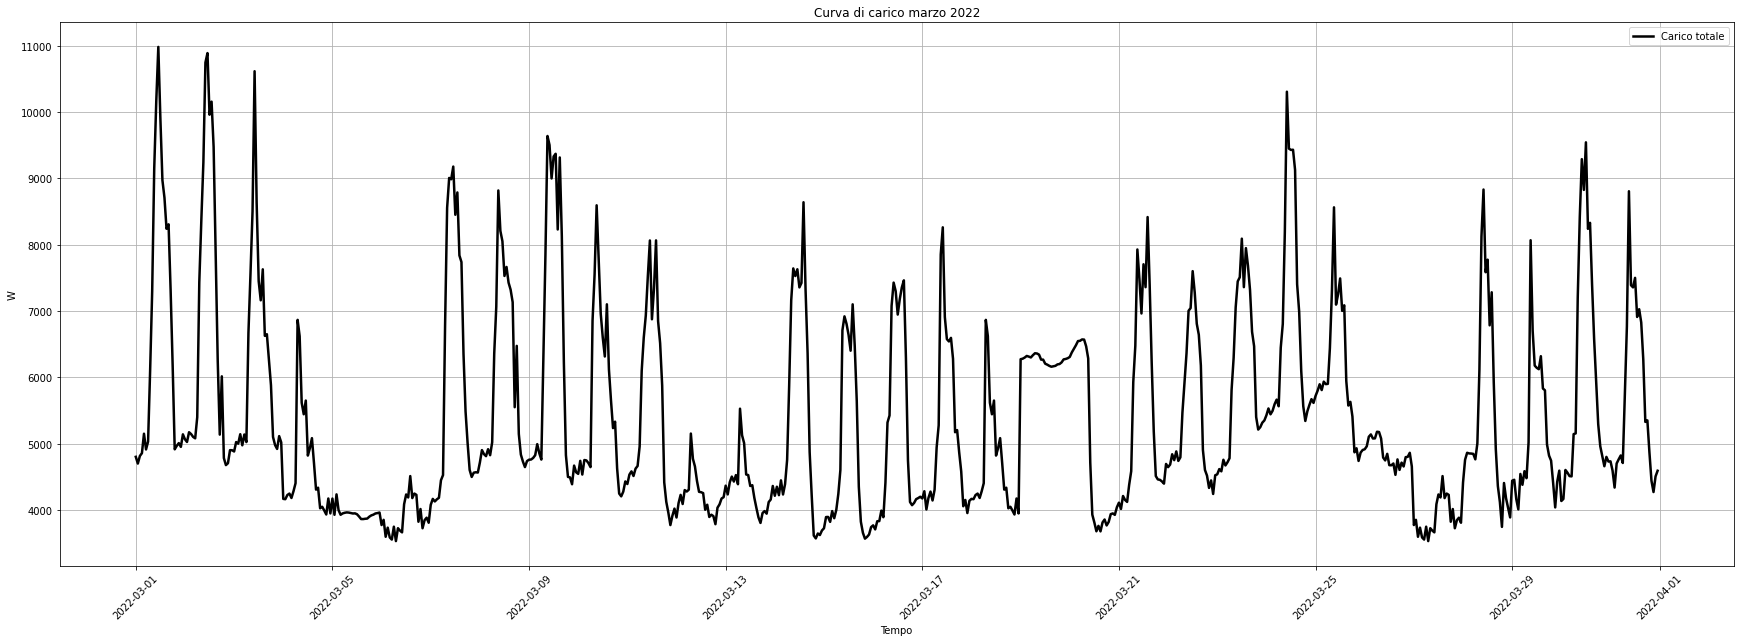

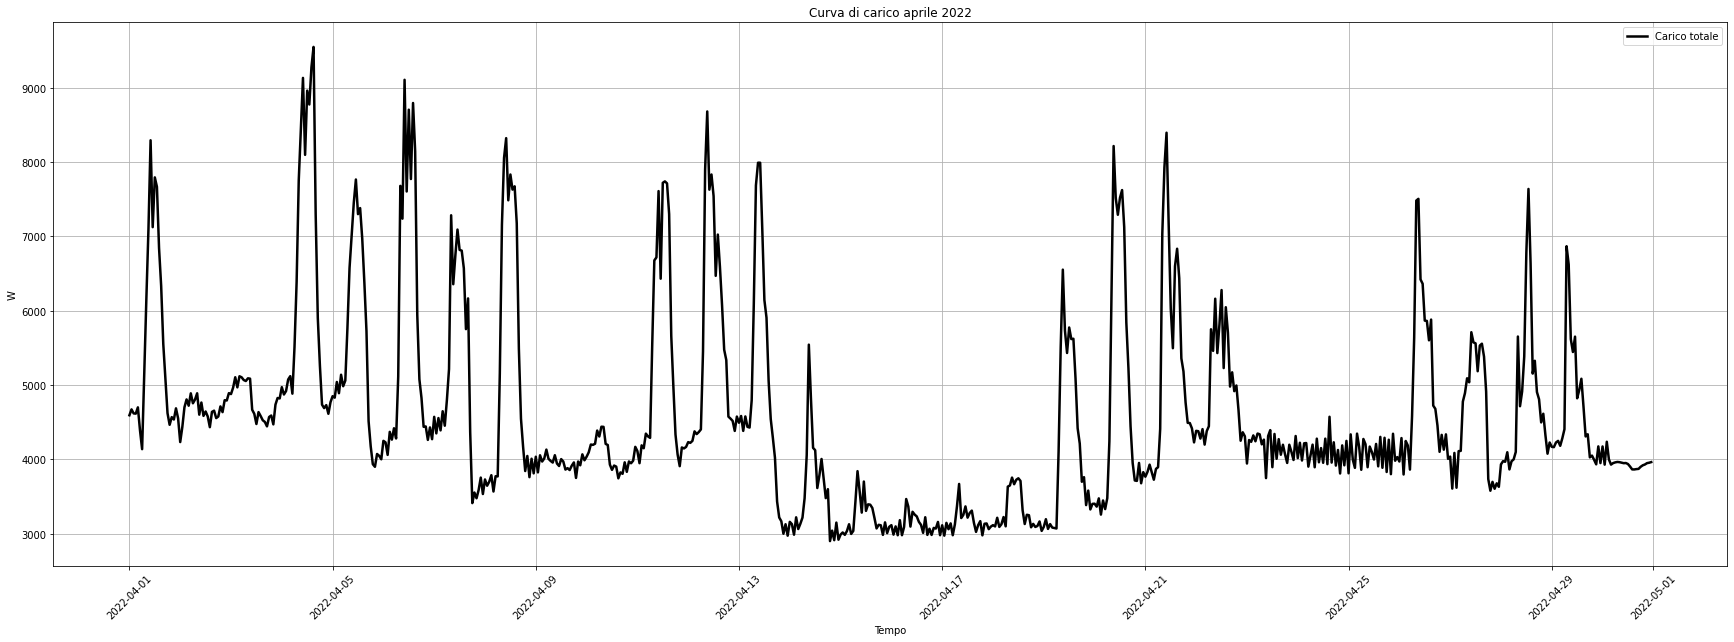

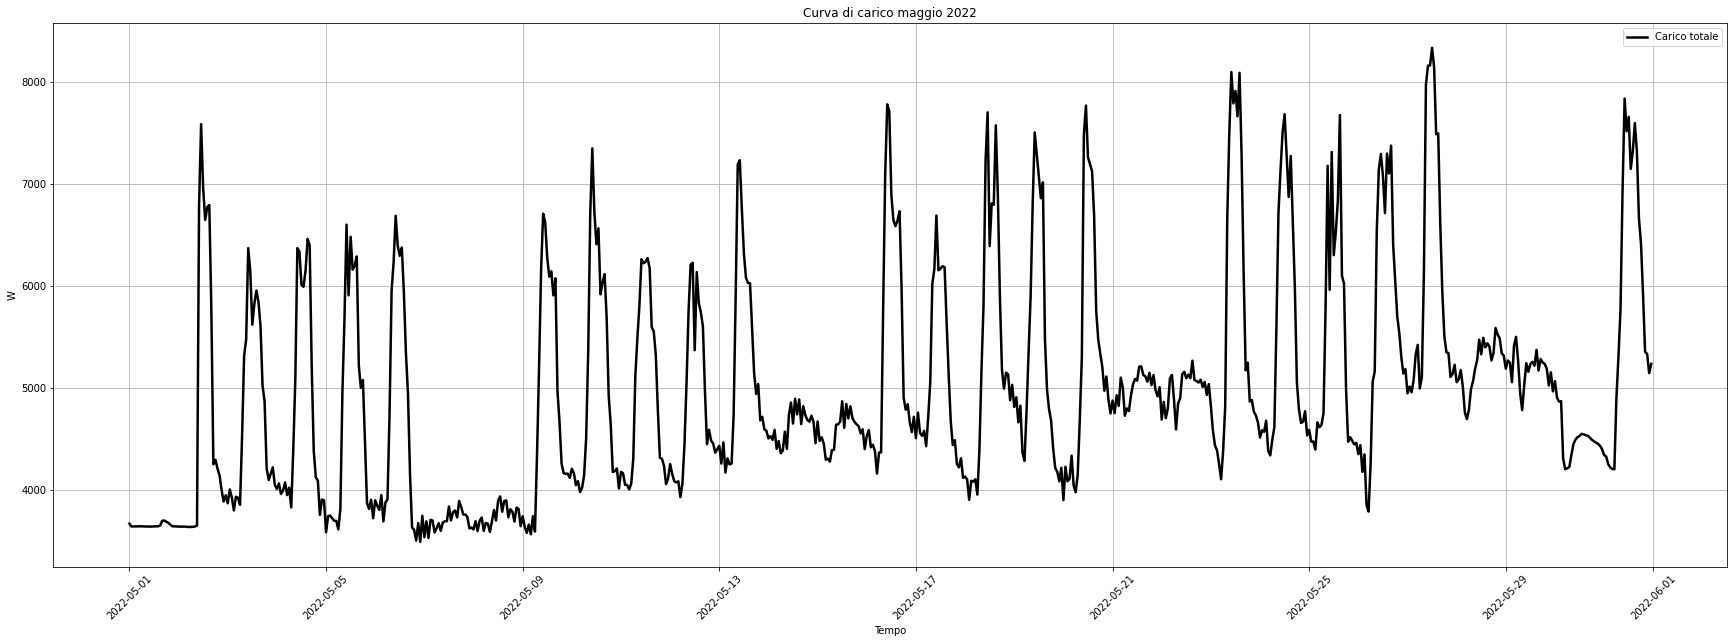

In [18]:
counter = 0
fields = ["Carico totale"]
path = os.path.join(plot_base_path, "DistributionLoadProcessed", "SumOfLines")
plot_distribution_load(df_training, fields, path)

In [ ]:
counter = 0
fields = ["Carico totale"]
path = os.path.join(plot_base_path, "DistributionLoadUnprocessed", "SumOfLines")
plot_distribution_load(df_plot, fields, path)

### Plot curva

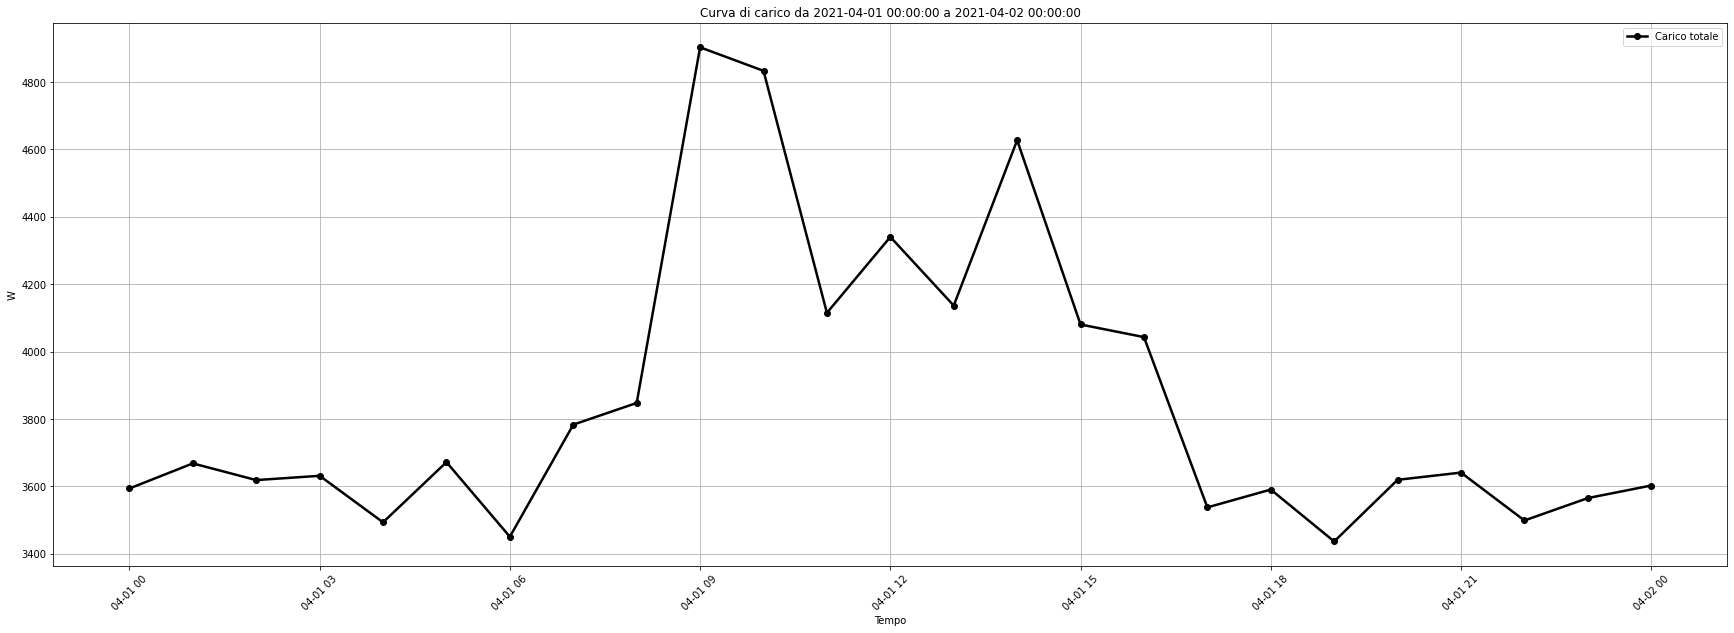

In [22]:
ft = "%Y-%m-%d %H:%M:%S"
start = datetime.strptime("2021-04-01 00:00:00", ft)
end = datetime.strptime("2021-04-02 00:00:00", ft)

title = "Curva di carico da " + str(start) + " a " + str(end)
xlabel = "Tempo"
ylabel = "W"
dim = (30,10)
plot_distribution(df_training, ["Carico totale"], start, end, dim, title, xlabel, ylabel, plot_base_path)

### Confronto curva processata e non processata

In [10]:
df = pd.DataFrame()
df["Carico processato"] = df_training["Carico totale"]
df["Carico non processato"] = df_plot["Carico totale"]

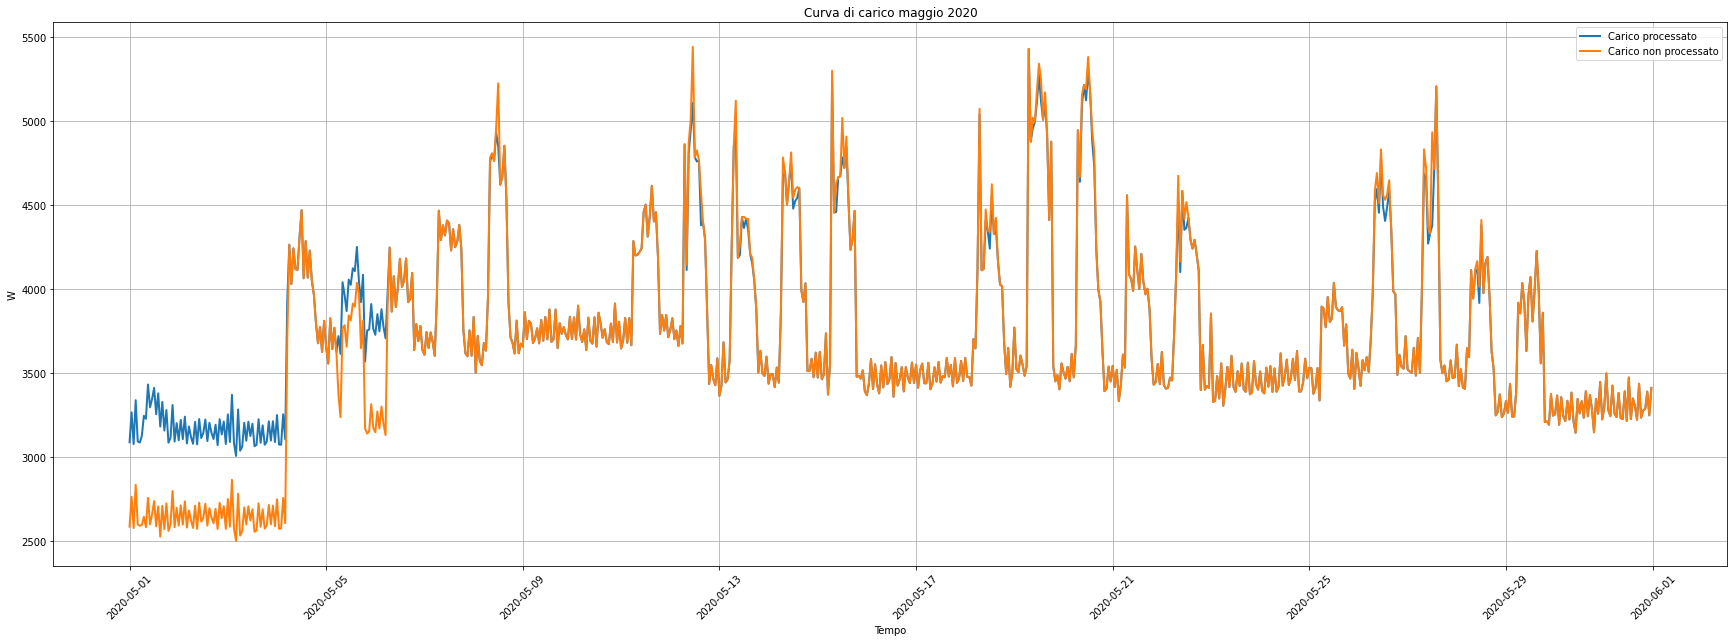

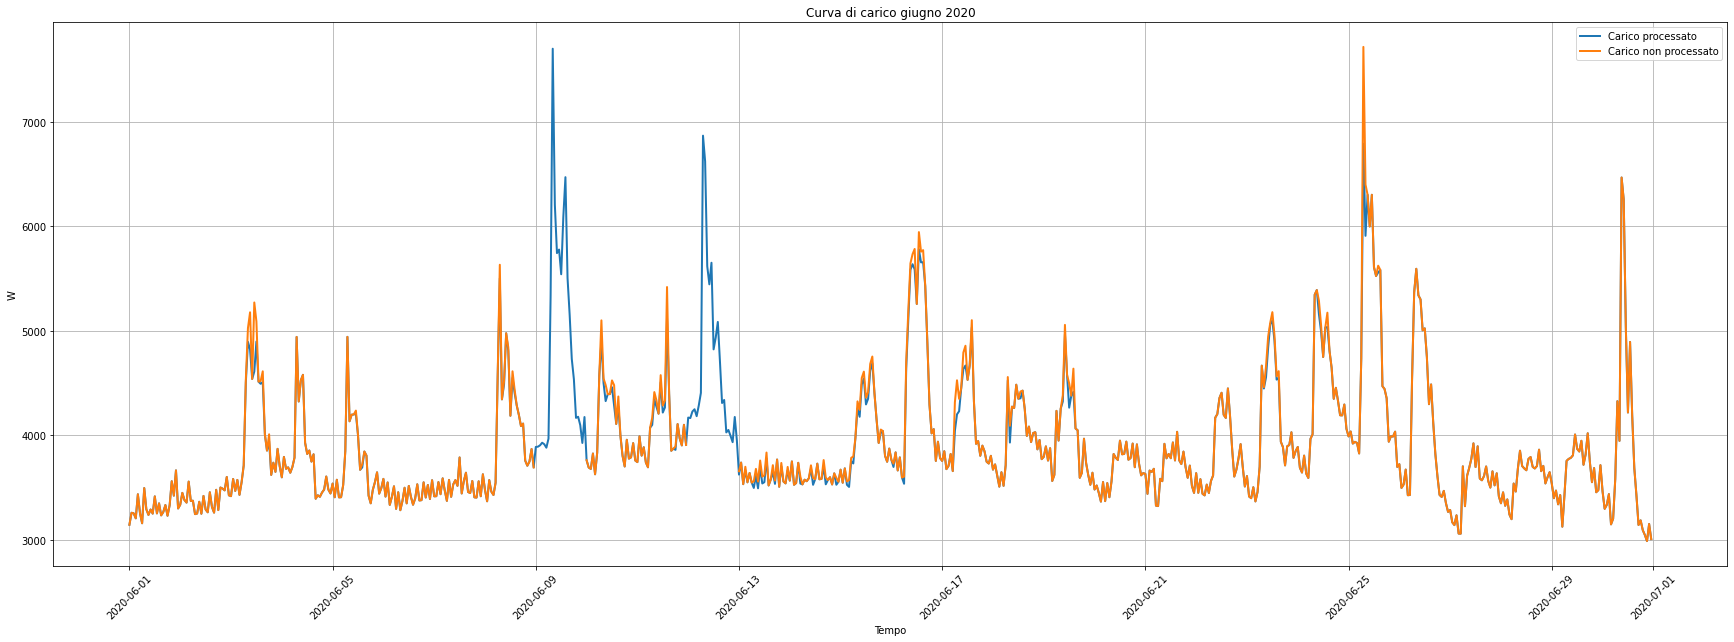

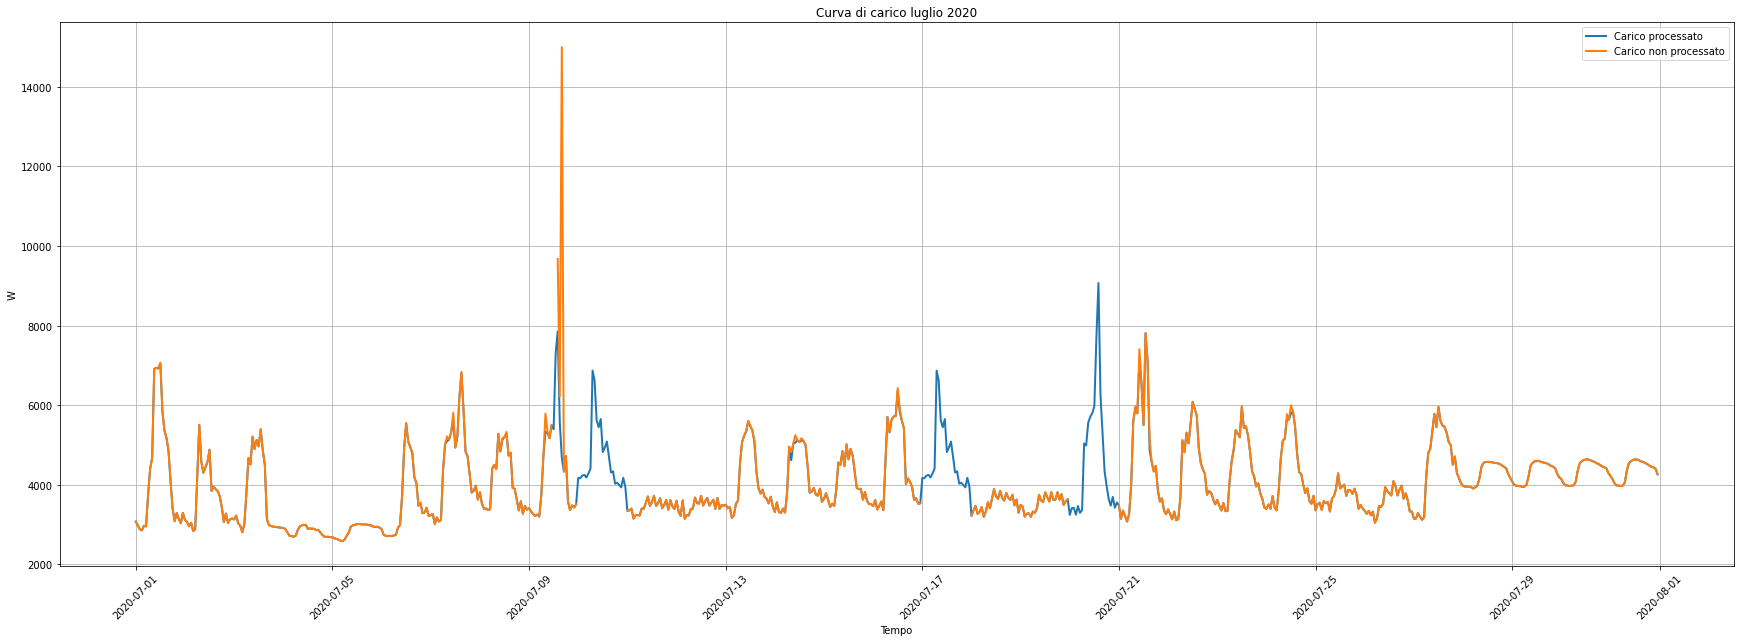

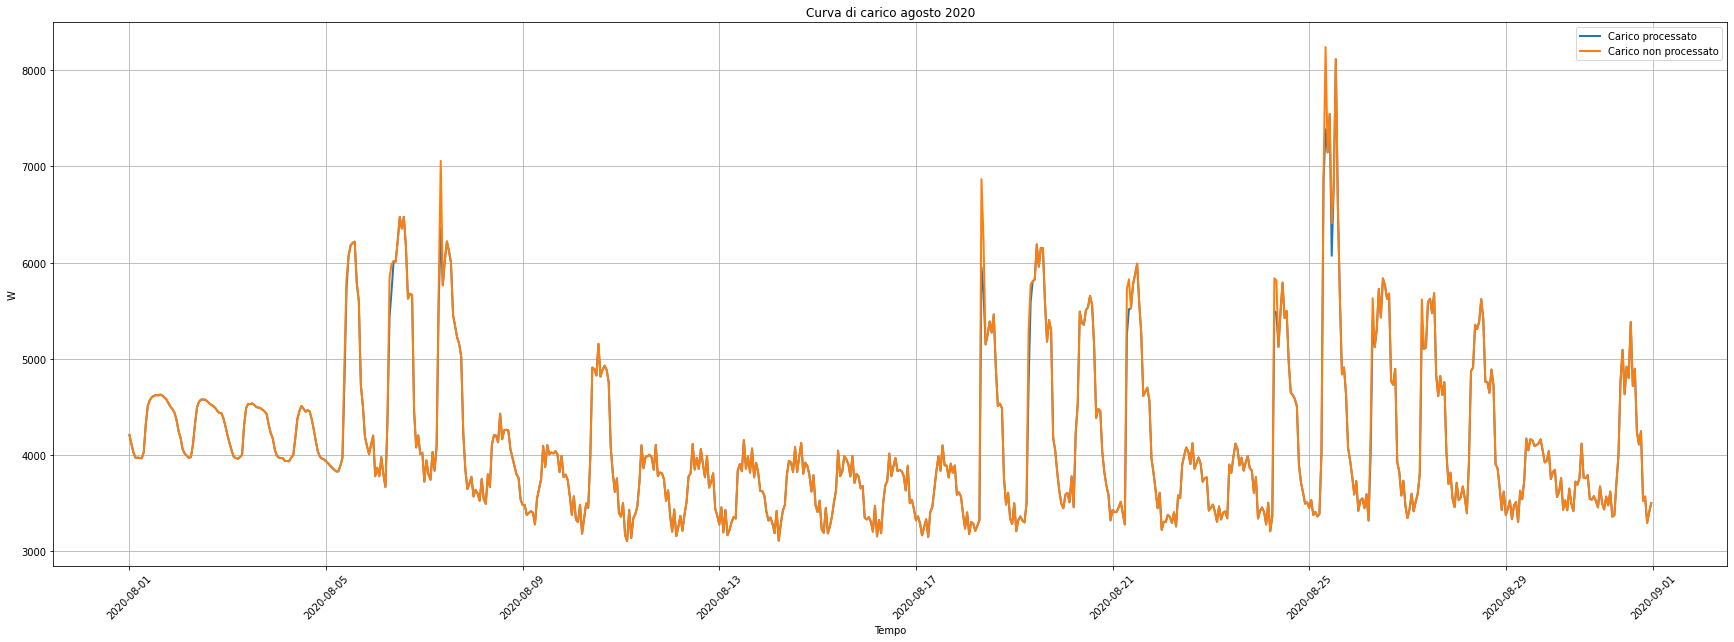

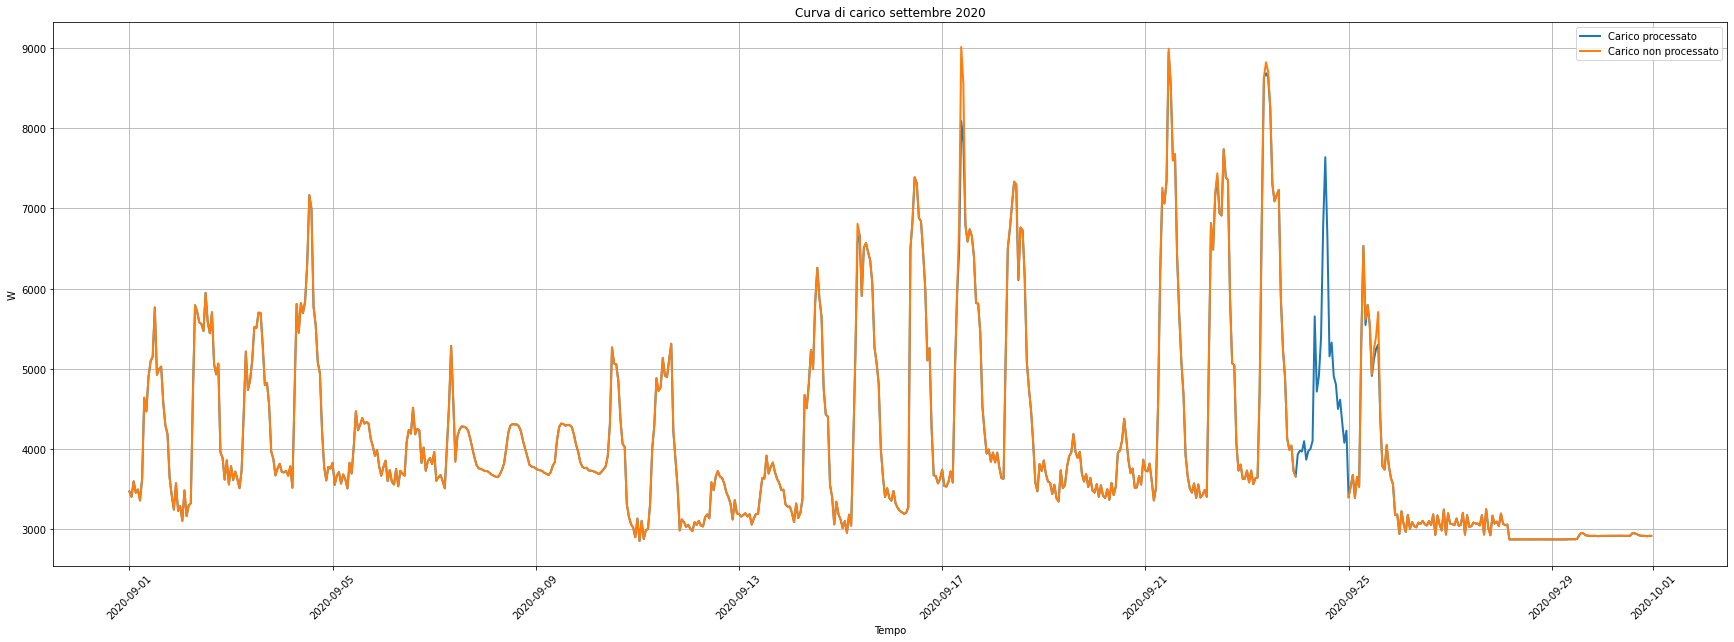

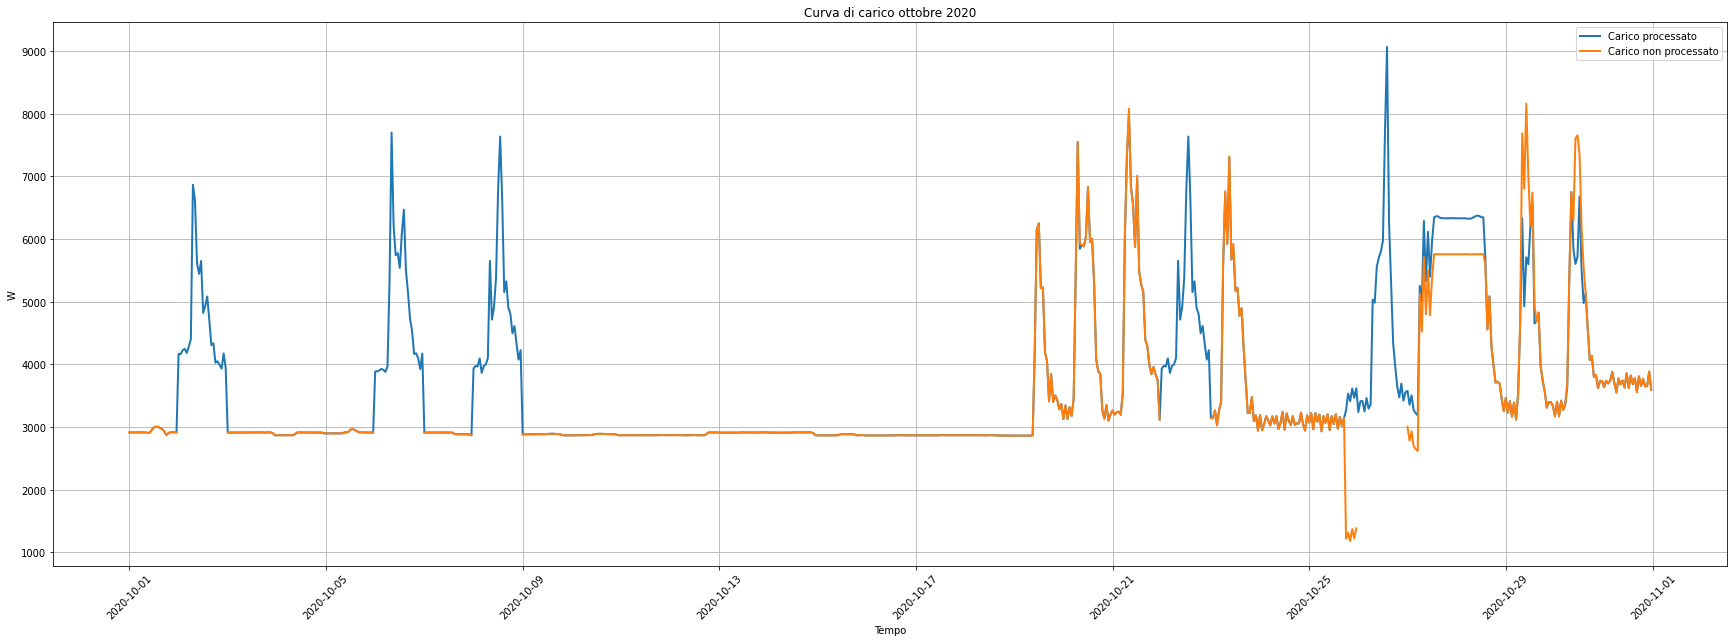

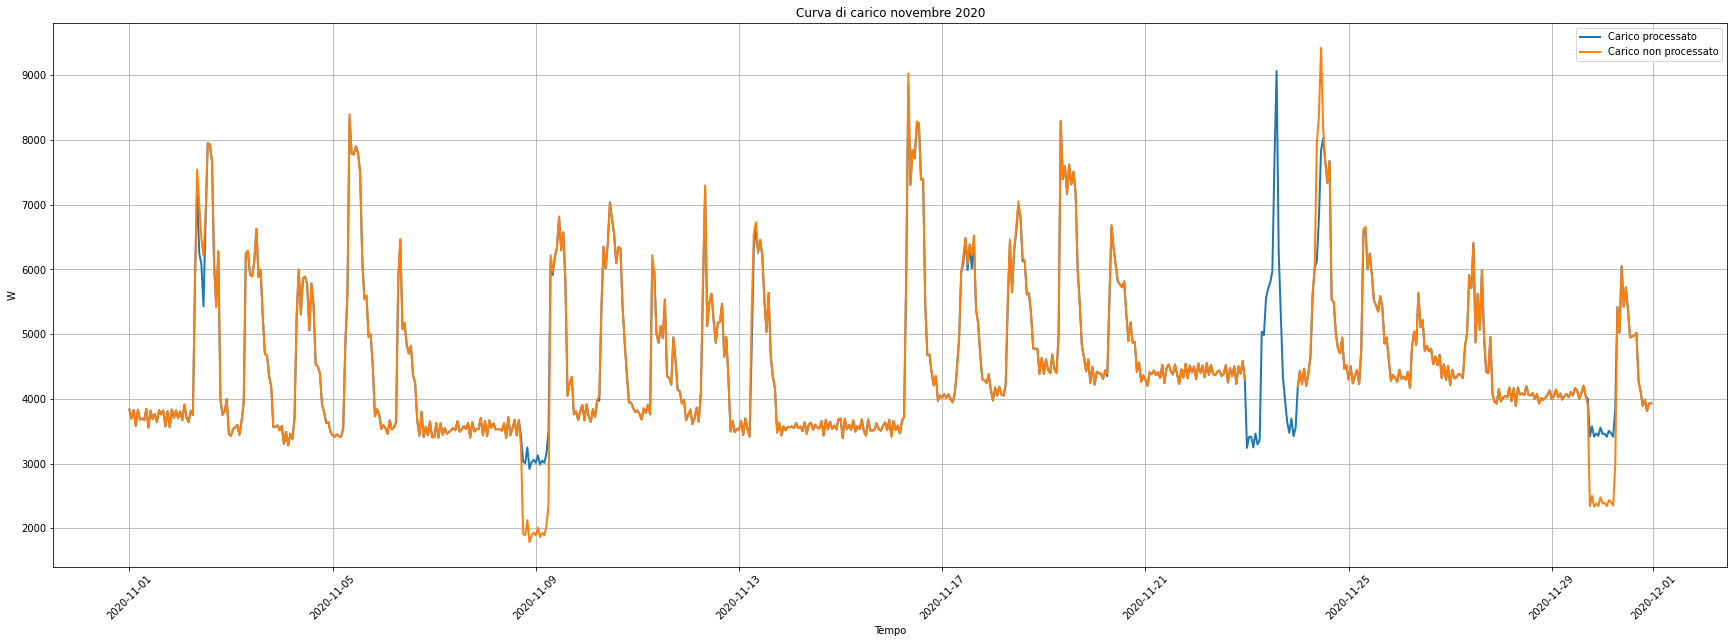

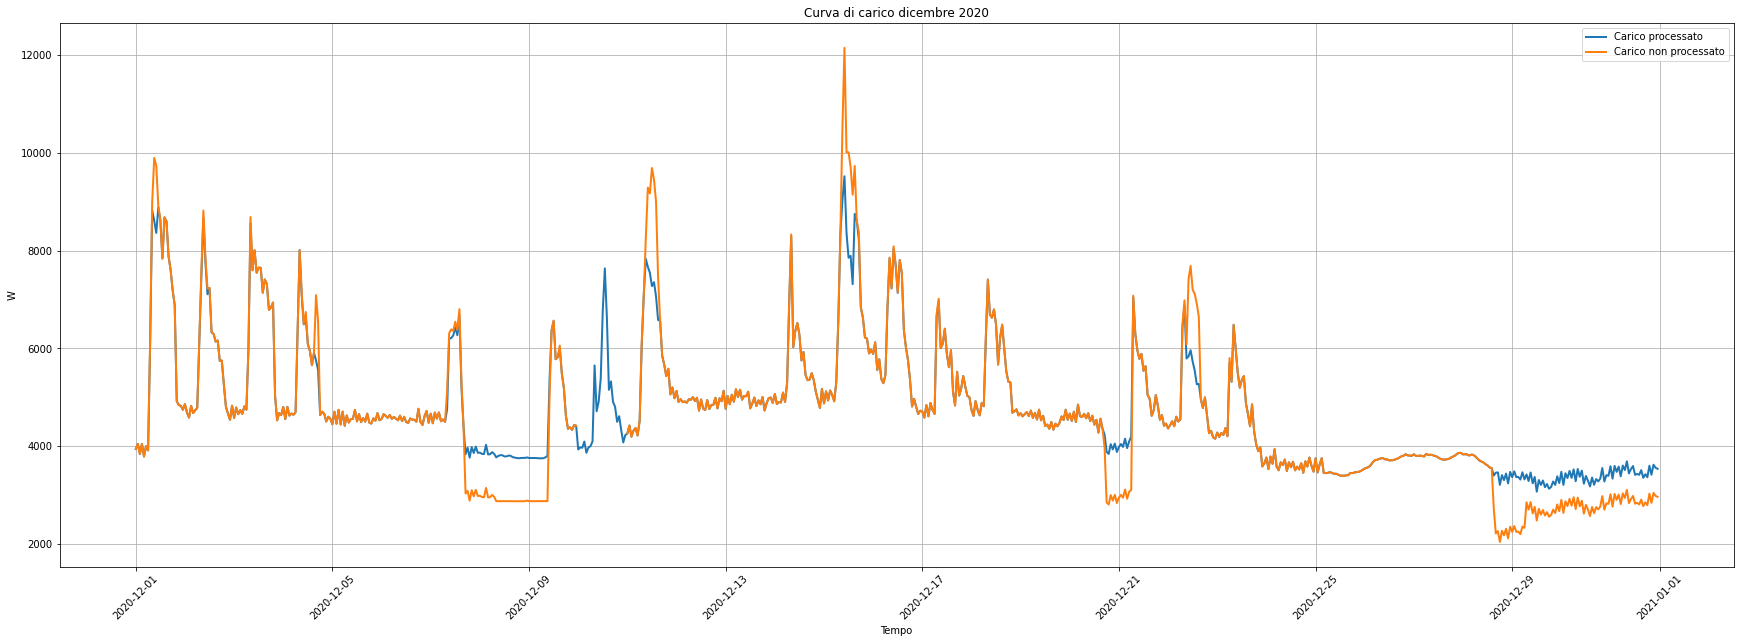

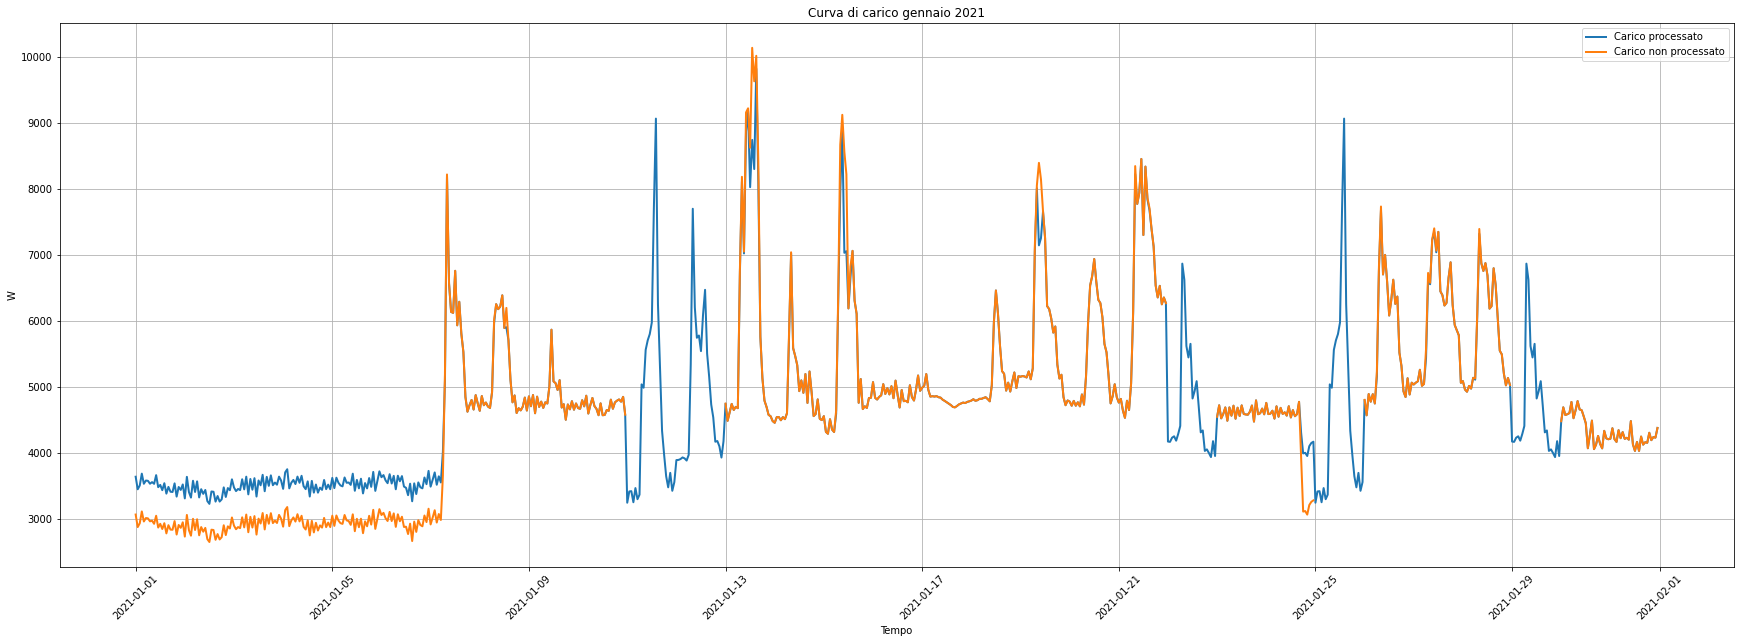

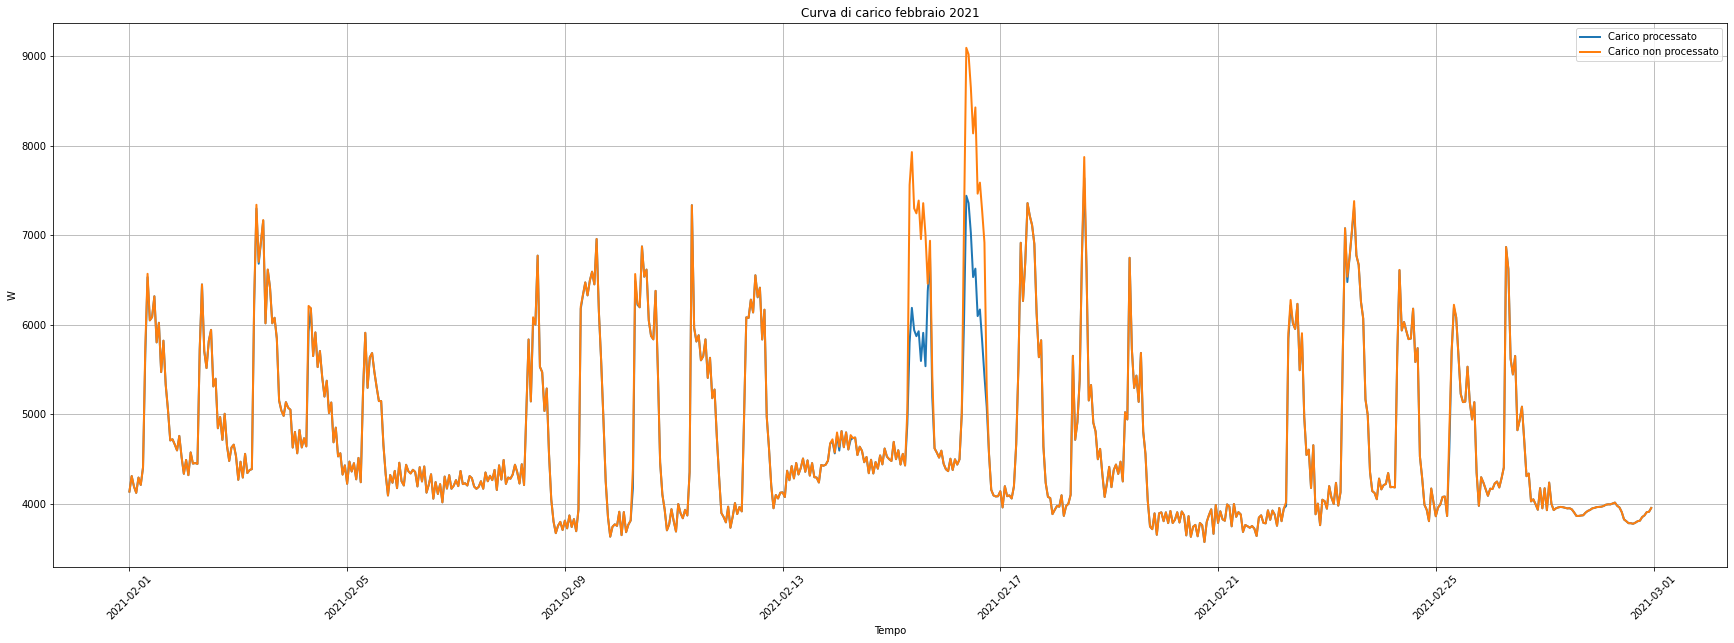

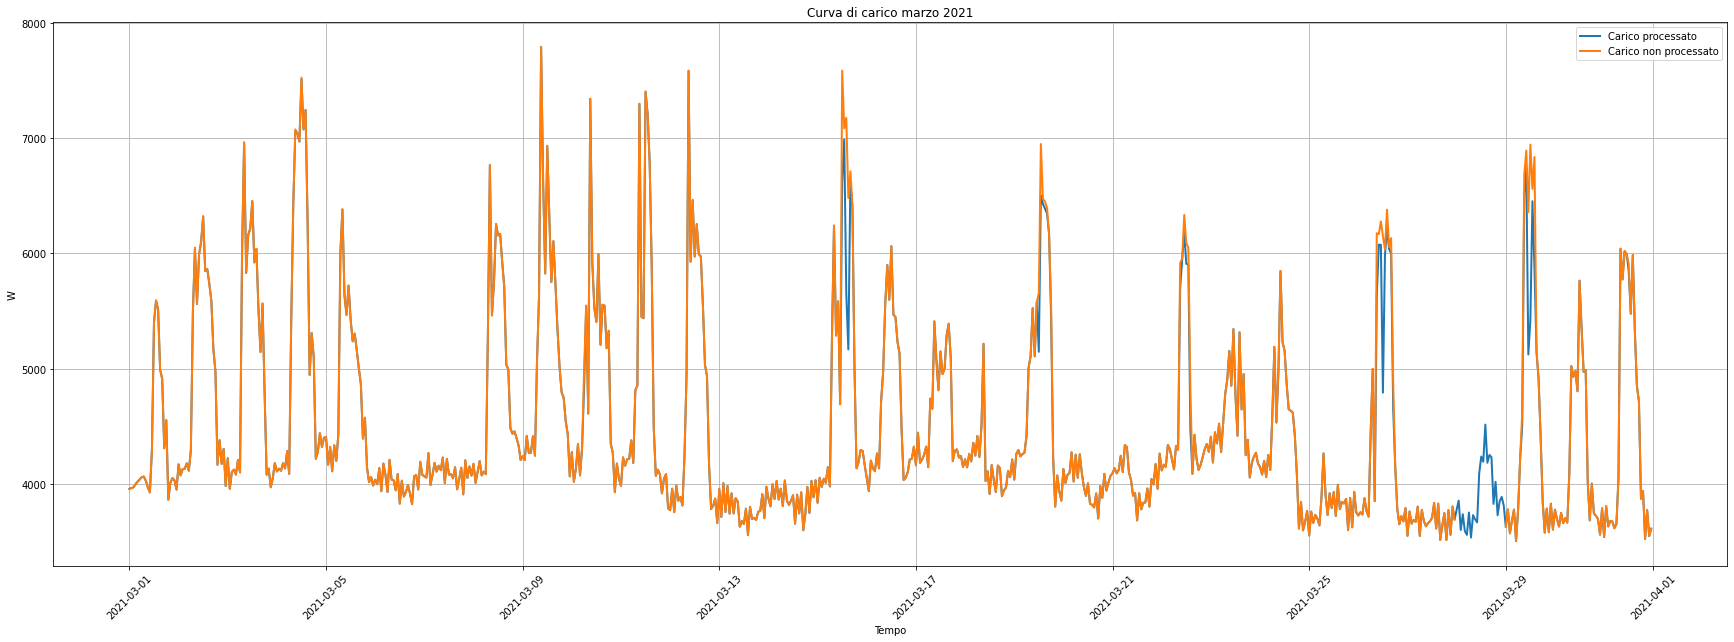

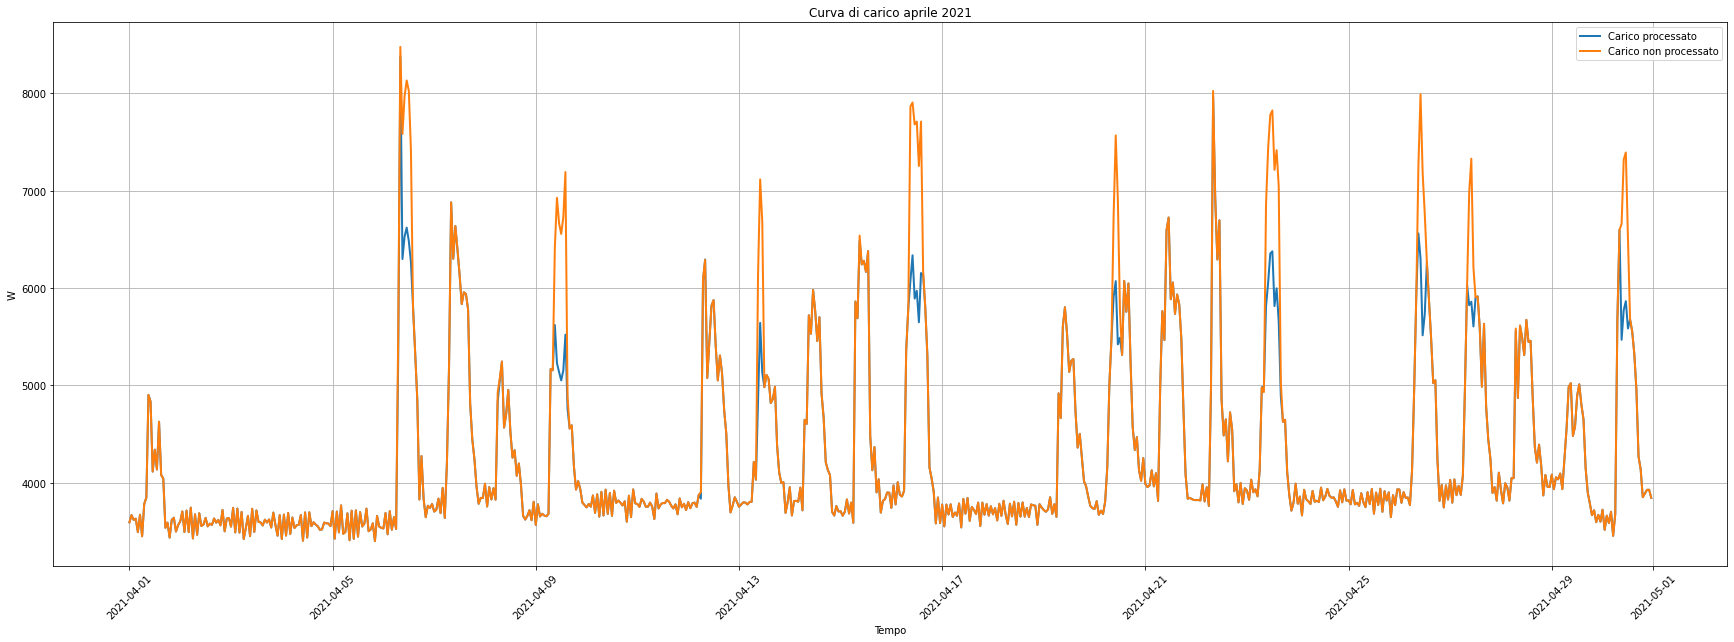

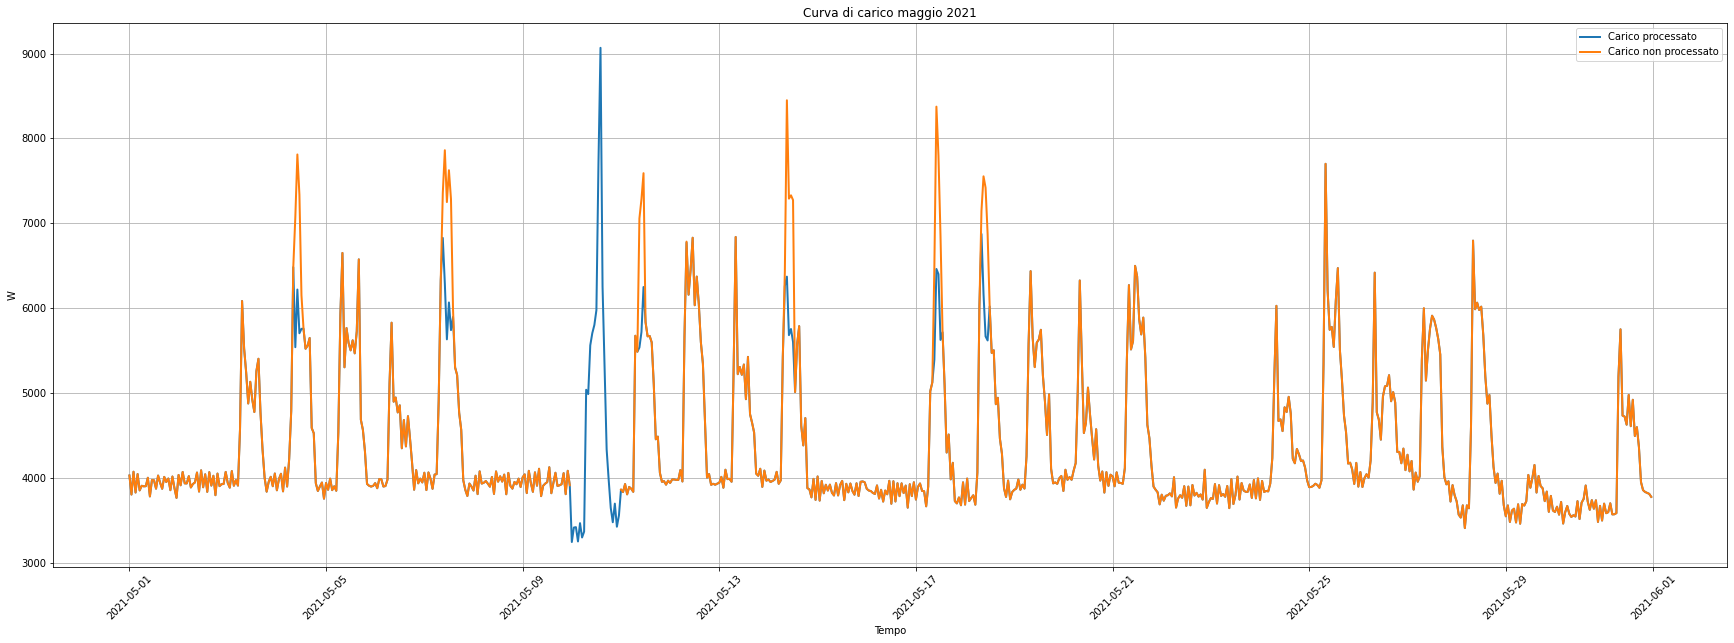

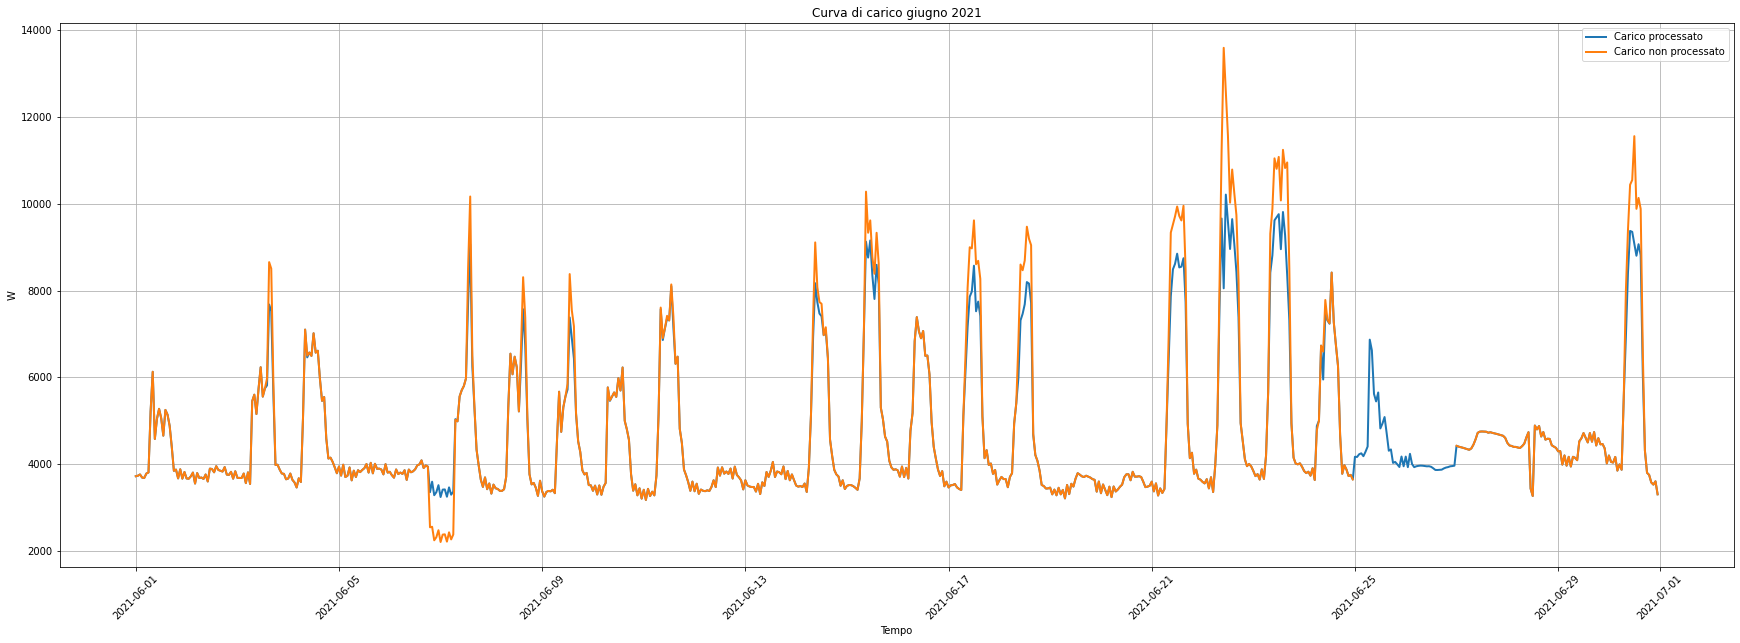

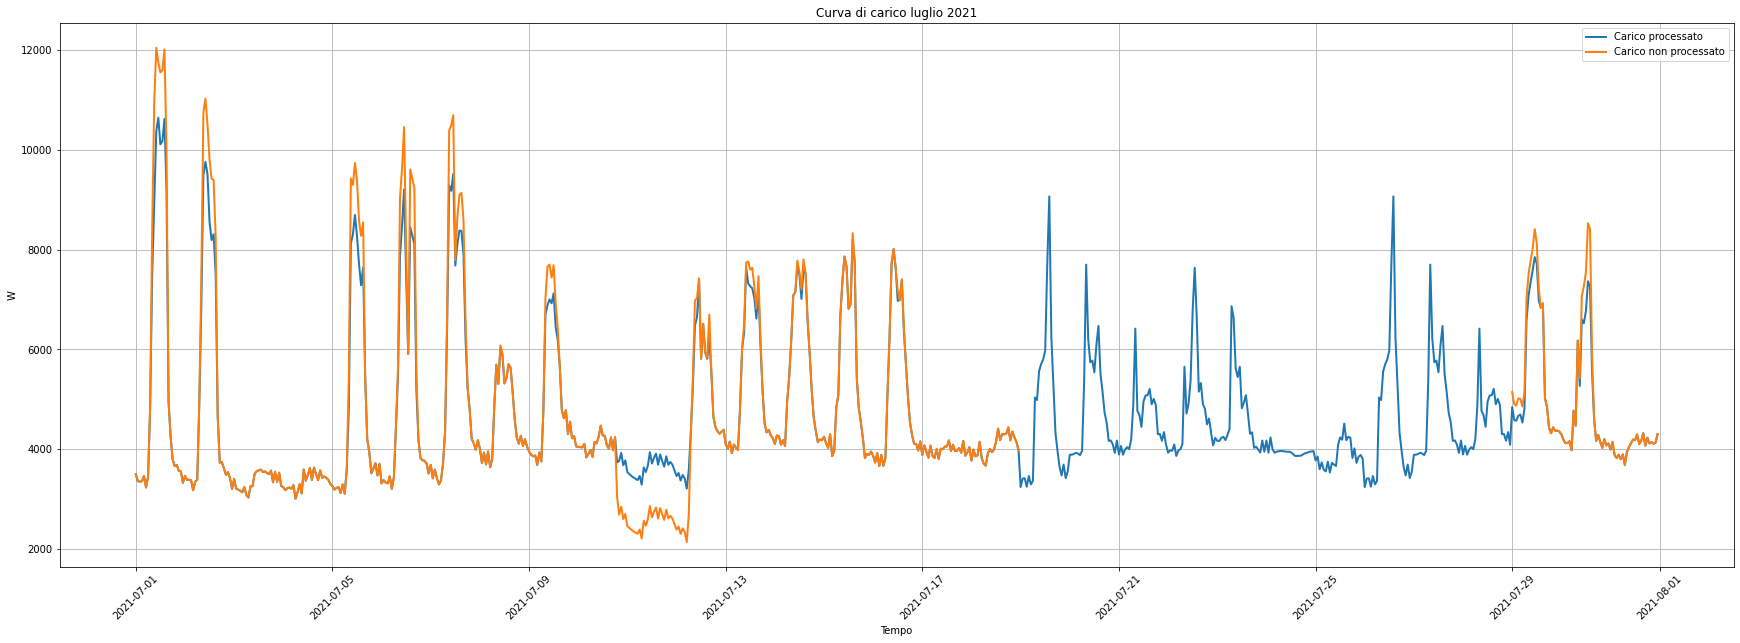

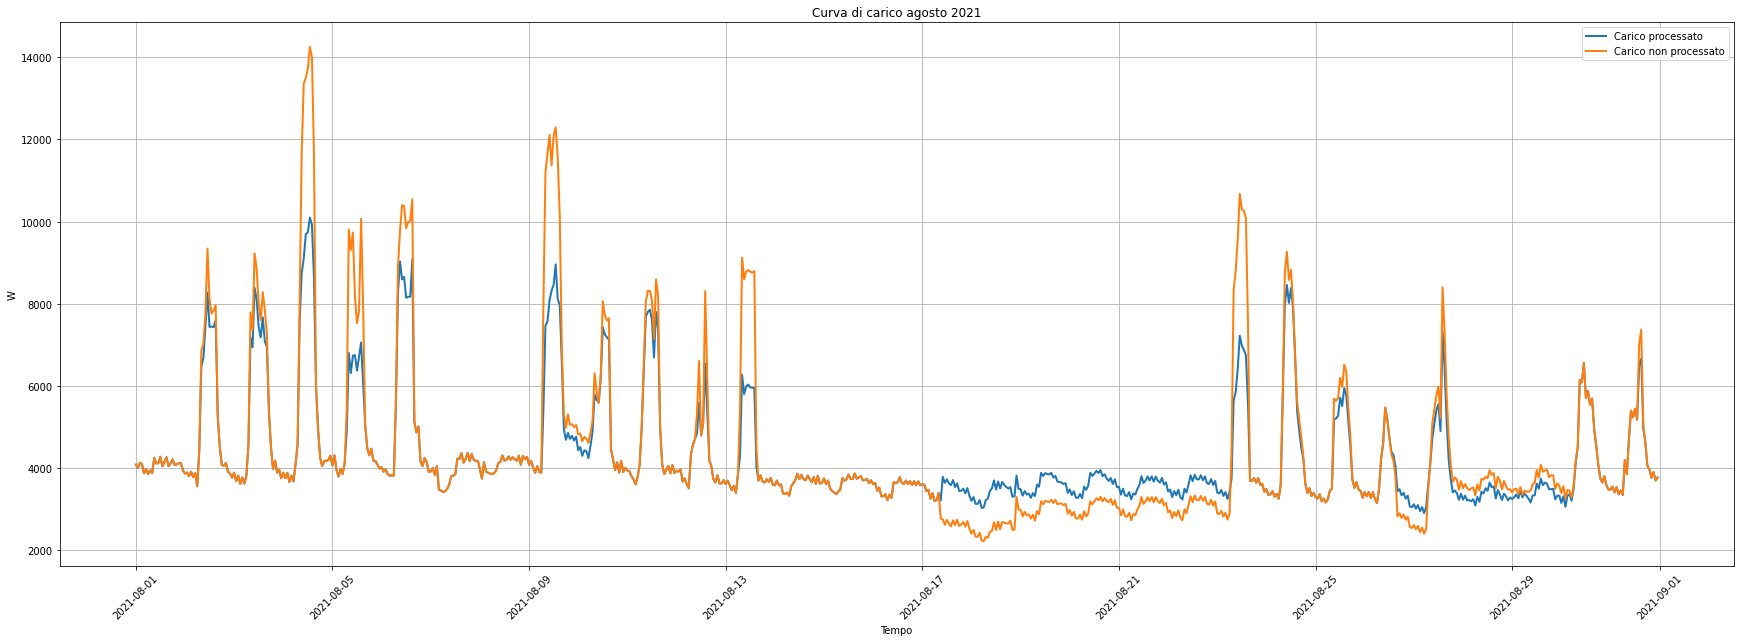

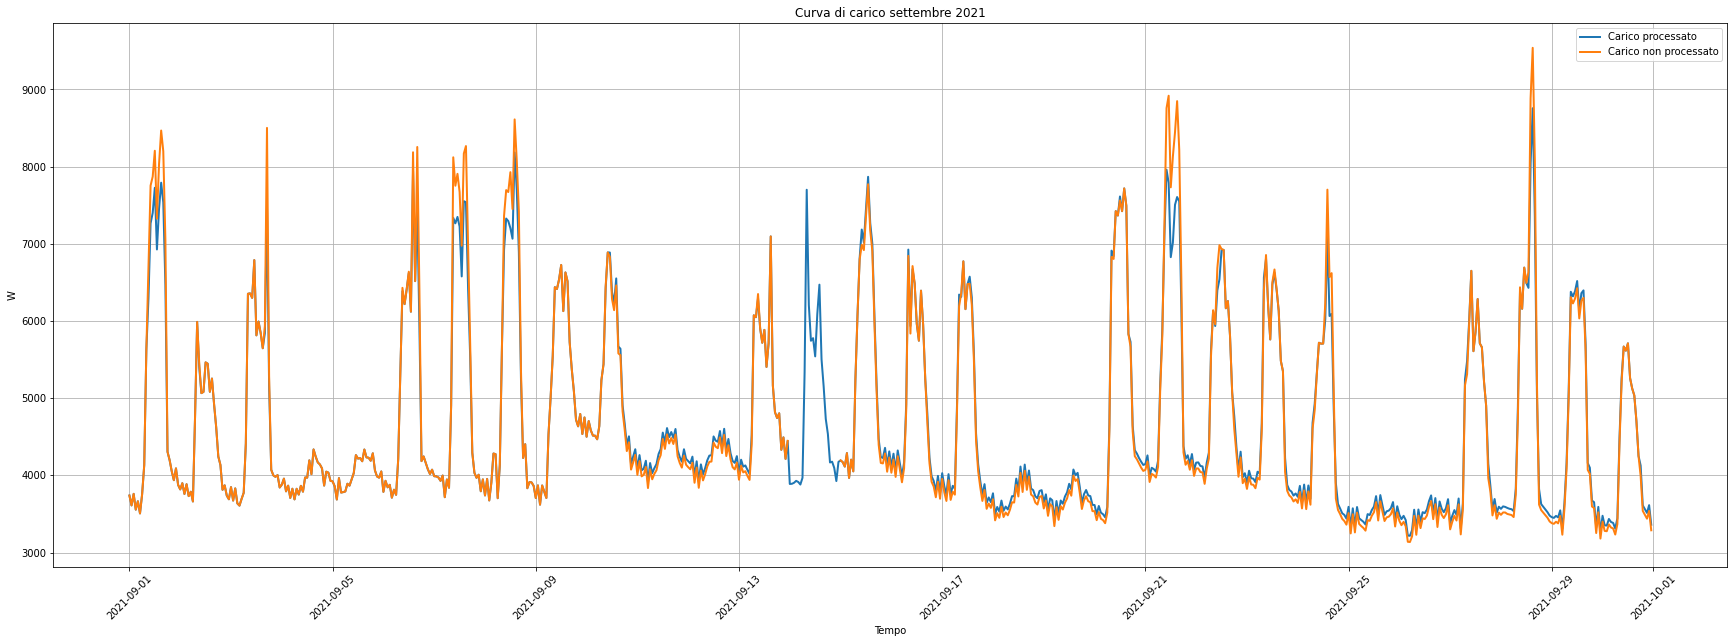

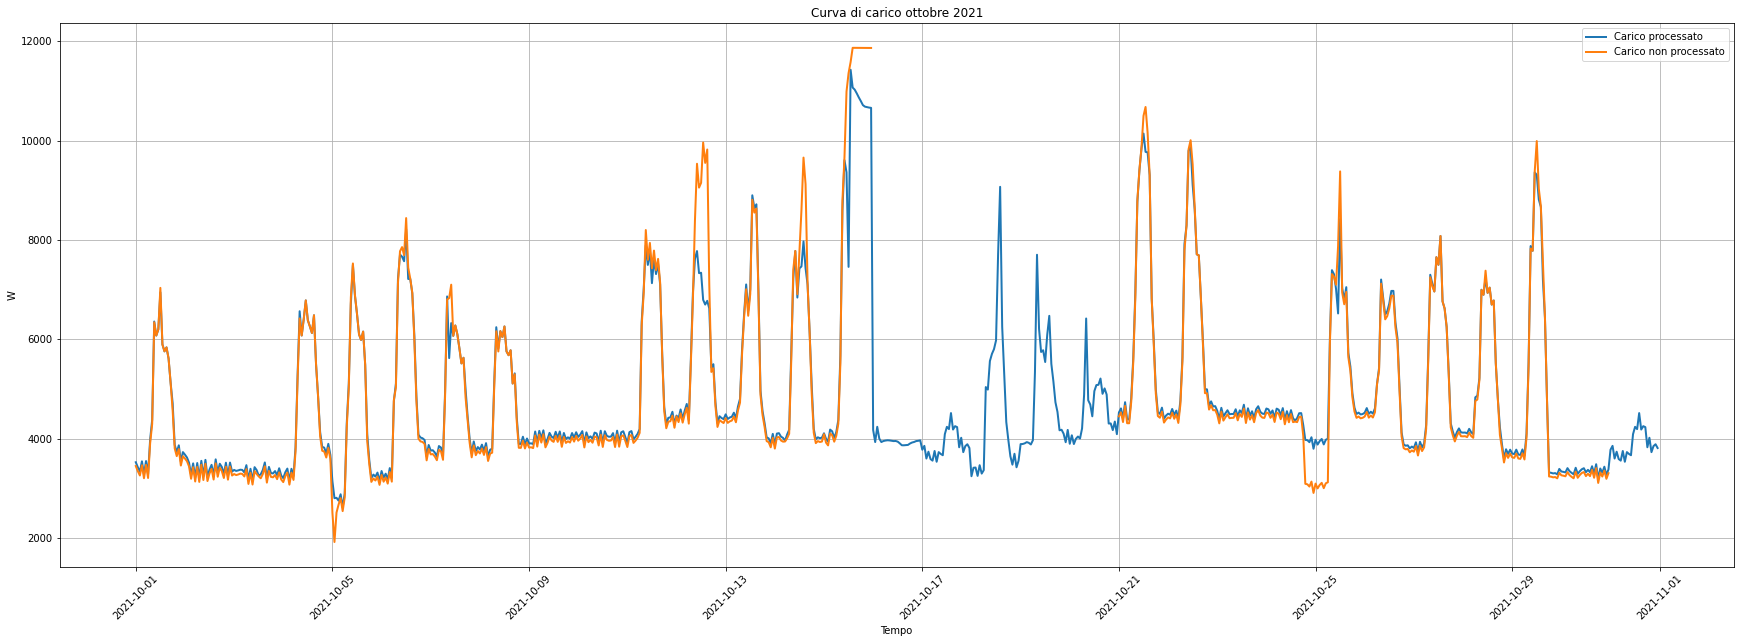

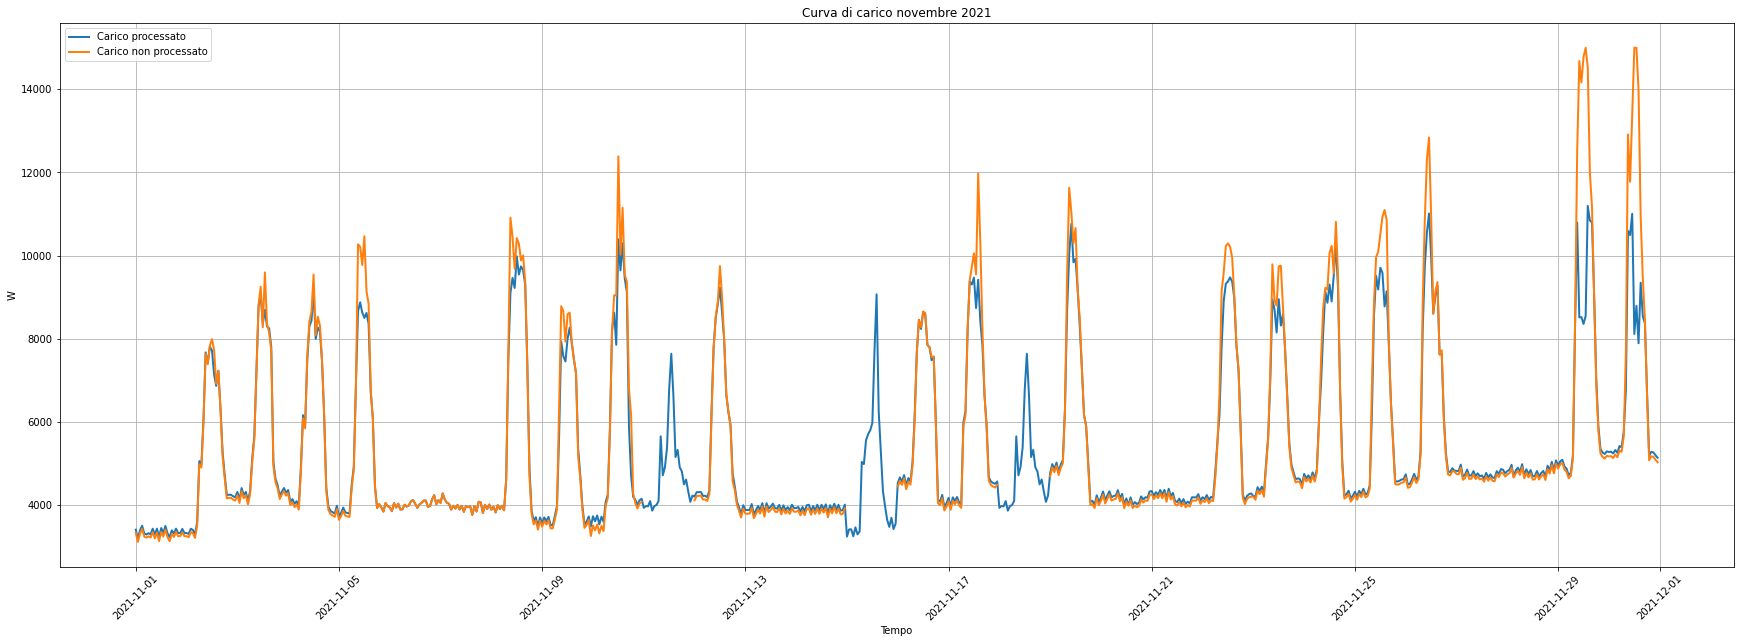

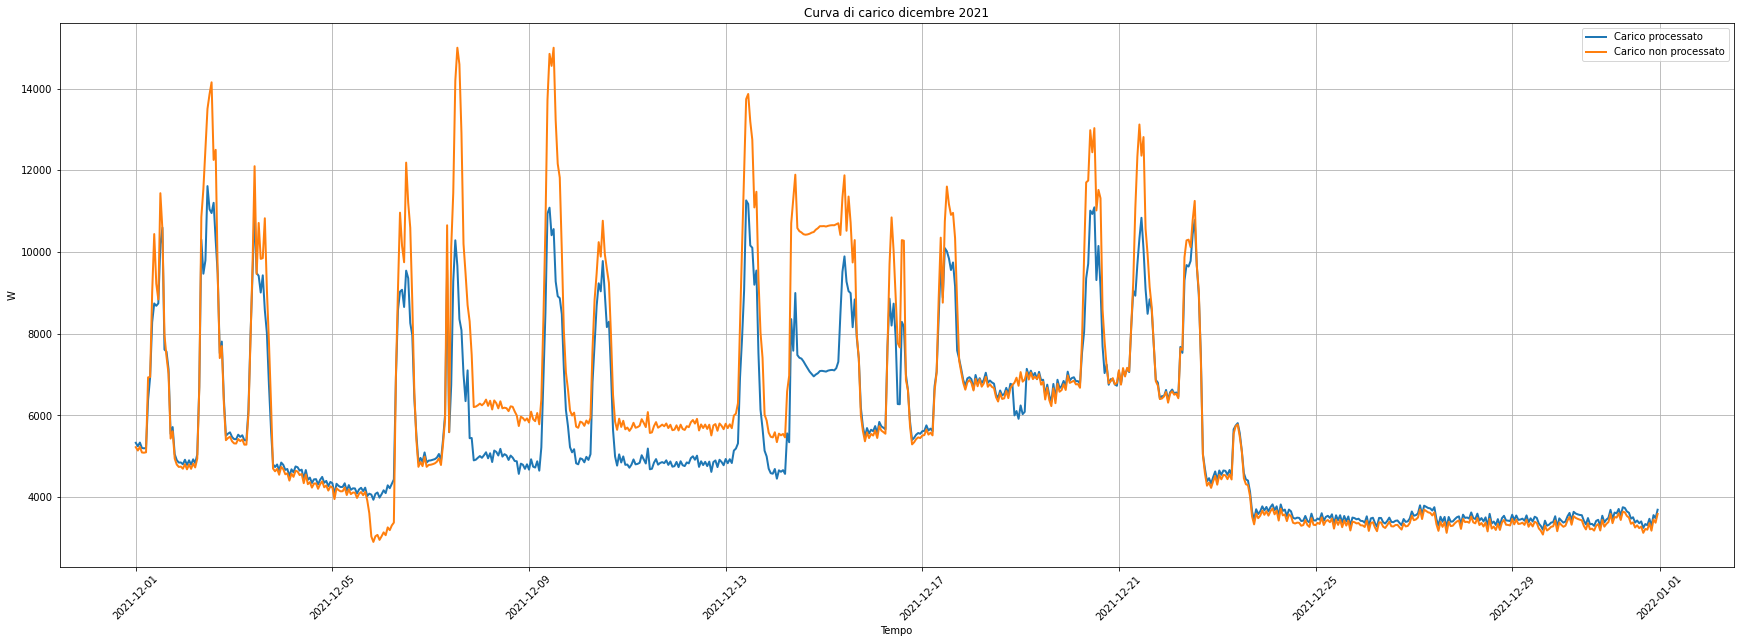

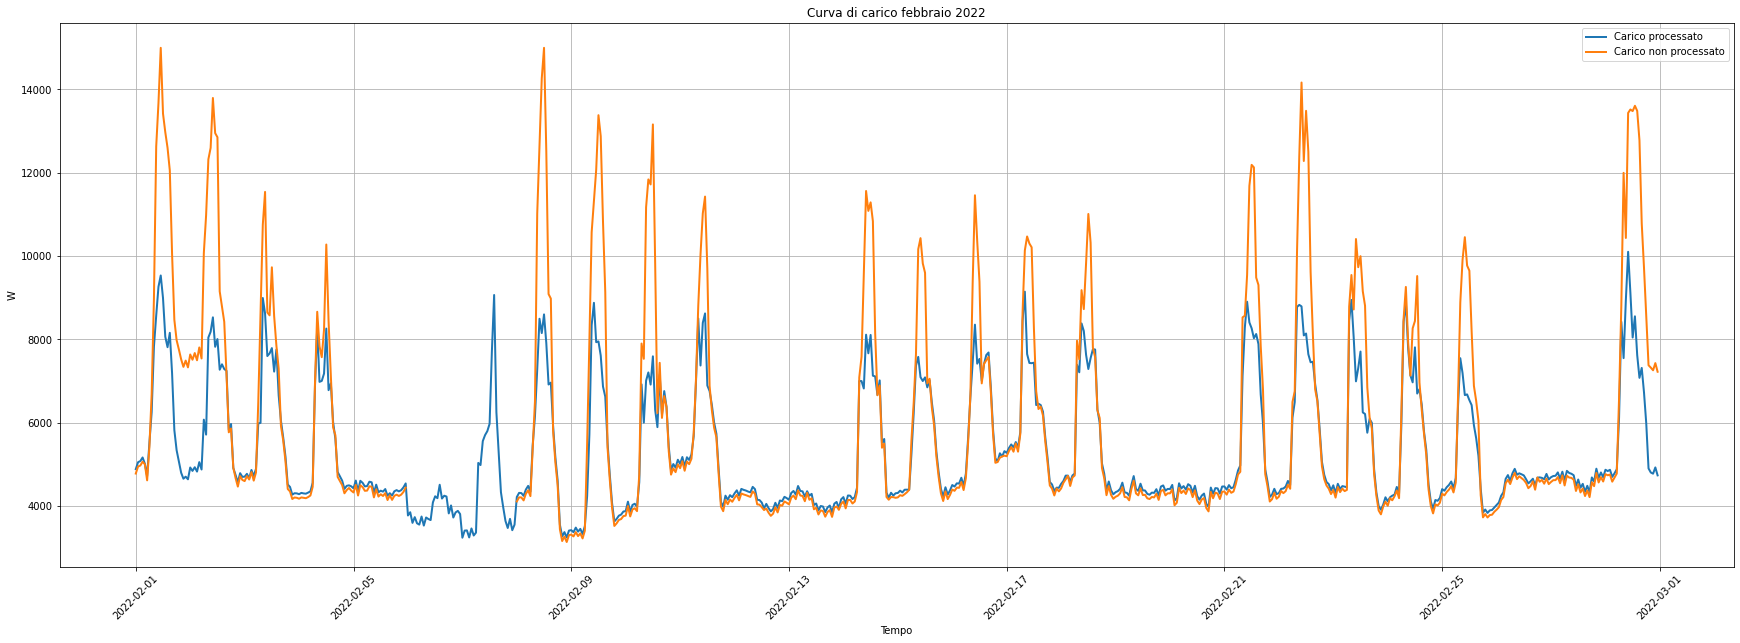

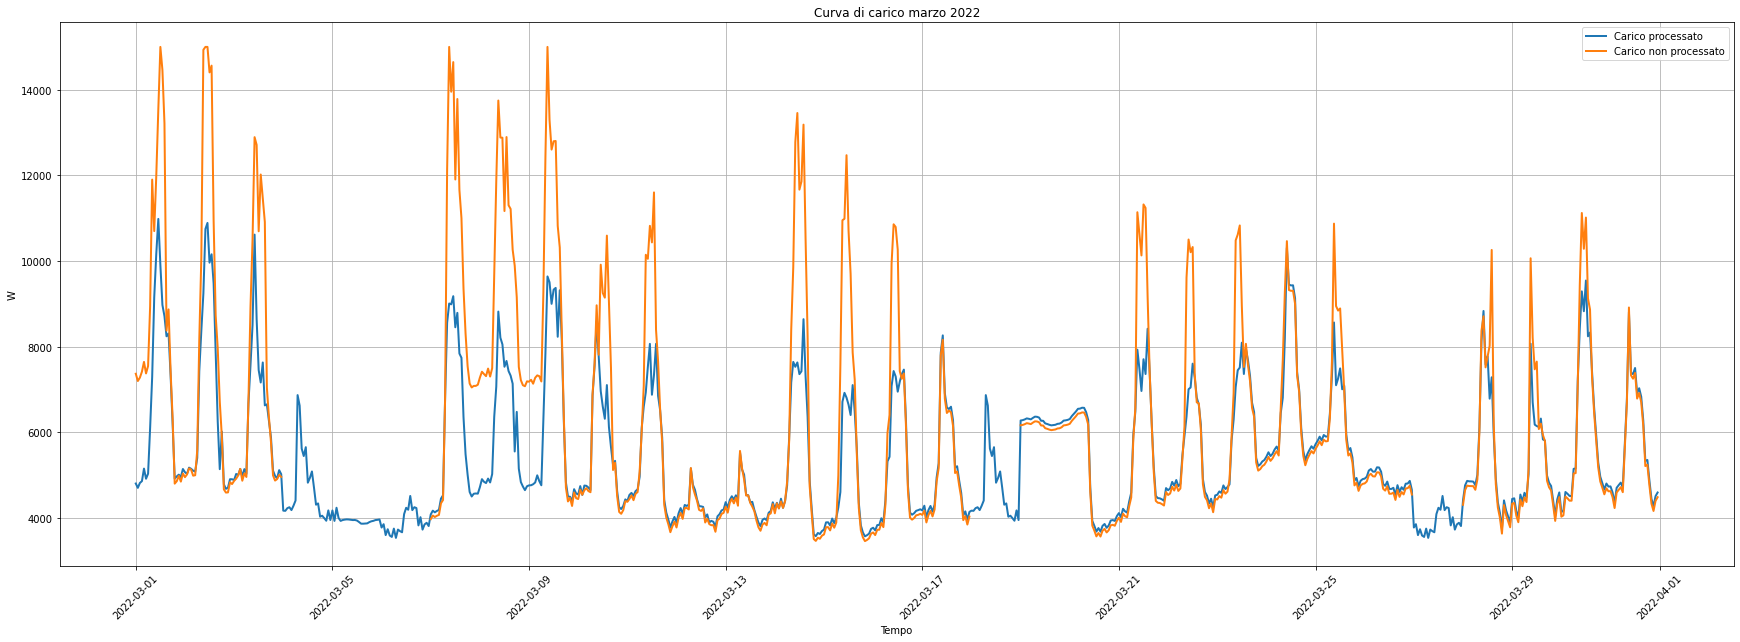

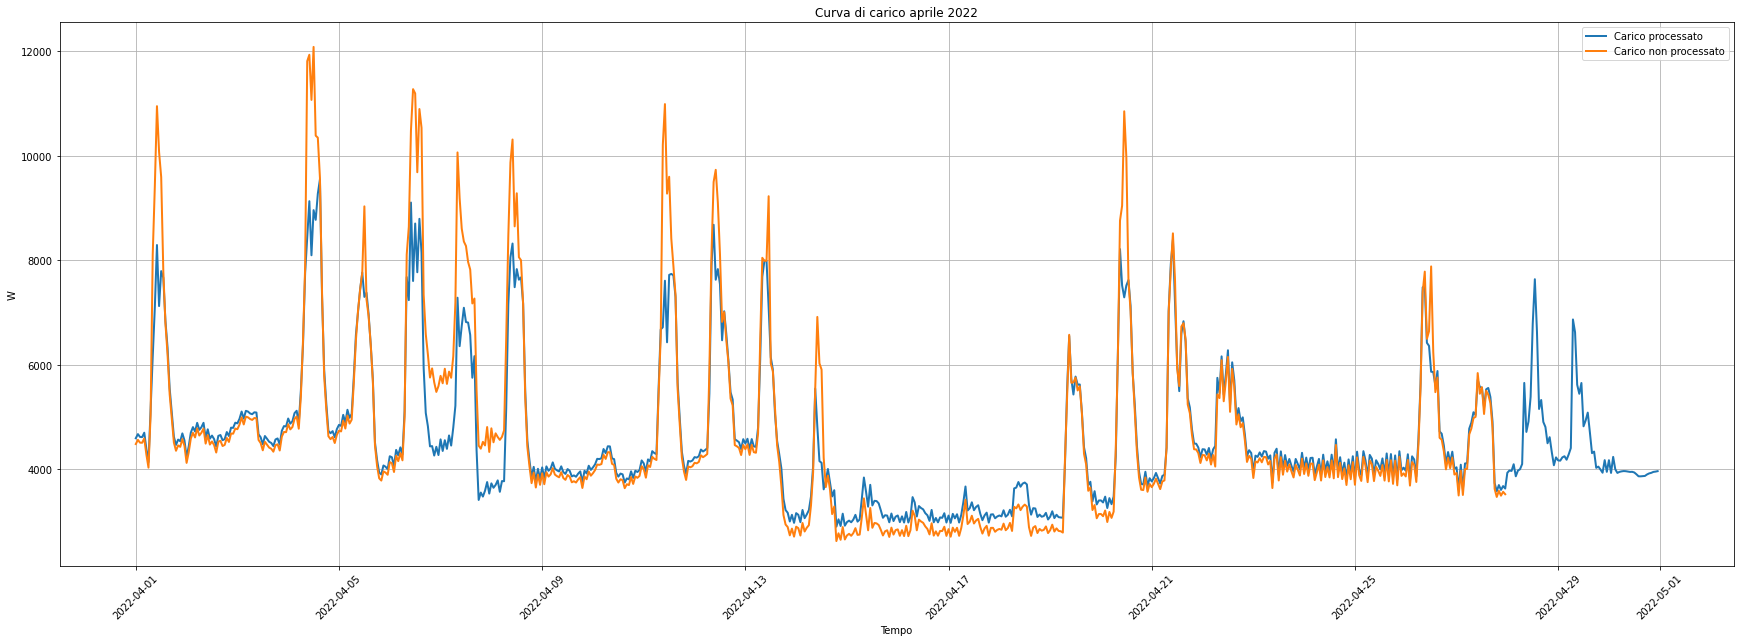

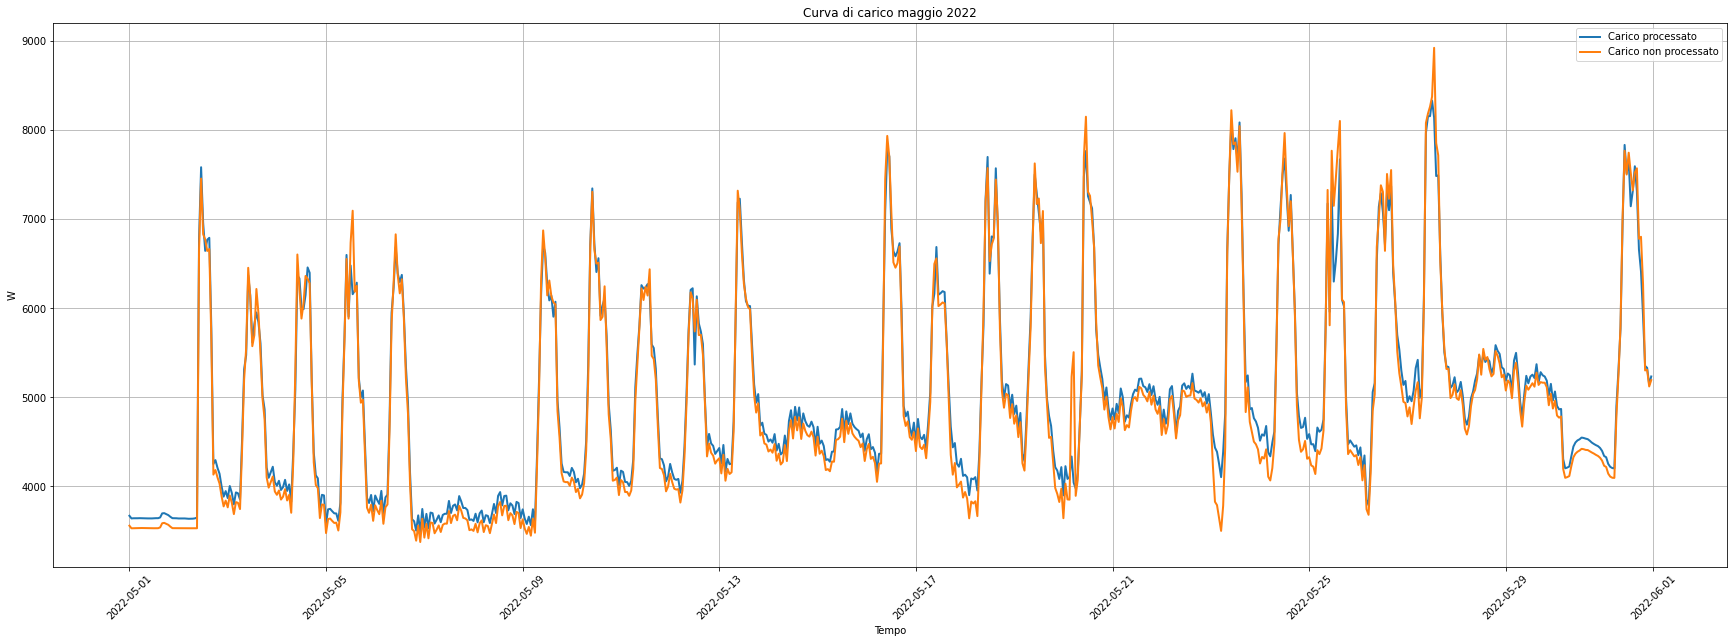

In [11]:
counter = 0
fields = ["Carico processato", "Carico non processato"]
path = os.path.join(plot_base_path, "Confronto")
plot_distribution_load(df, fields, path)

### Plot curva personalizzata

In [ ]:
ft = "%Y-%m-%d %H:%M:%S"
start = datetime.strptime("2020-05-10 00:00:00", ft)
end = datetime.strptime("2020-05-11 00:00:00", ft)

title = "Curva di carico da " + str(start) + " a " + str(end)
xlabel = "Tempo"
ylabel = "W"
dim = (30,10)
plot_distribution(df, ["Carico processato", "Carico non processato"], start, end, dim, title, xlabel, ylabel, plot_base_path)

# Plot carichi

In [ ]:
path_dataset = os.path.join("..", "Preprocessing", "Dataset", "dataset_processed.csv")
df_processed = pd.read_csv(path_dataset, index_col="Timestamp")
df_processed.index = pd.to_datetime(df_processed.index)

path_dataset = os.path.join("..", "Preprocessing", "Dataset", "dataset_unprocessed.csv")
df_unprocessed = pd.read_csv(path_dataset, index_col="Timestamp")
df_unprocessed.index = pd.to_datetime(df_unprocessed.index)

In [ ]:
fields = [
    'Potenza di cabina L1', 'Luci di emergenza L1', 'Luci degli uffici L1',
    'Fan coil L1', 'Forza motrice L1', 'Pompa di calore L2',
    'Luci di emergenza L2', 'Luci degli uffici L2', 'Fan coil L2',
    'Forza motrice L2', 'Luci di cabina L3', 'Luci di emergenza L3',
    'Luci degli uffici L3', 'Fan coil L3', 'Forza motrice L3'
]
field = "Forza motrice L1"

In [ ]:
df = pd.DataFrame()
df[field + " processato"] = df_processed[field]
df[field + " non processato"] = df_unprocessed[field]

In [ ]:
counter = 0
fields = [field + " processato", field + " non processato"]
path = os.path.join(plot_base_path, "Confronto")
plot_distribution_load(df, fields, path)

### Plot carico di confronto

In [ ]:
ft = "%Y-%m-%d %H:%M:%S"
start = datetime.strptime("2021-12-20 00:00:00", ft)
end = datetime.strptime("2021-12-22 00:00:00", ft)

field = "Forza motrice L1"

title = field + " da " + str(start) + " a " + str(end)
xlabel = "Tempo"
ylabel = "W"
dim = (30,10)
fields = [field + " processato", field + " non processato"]
plot_distribution(df, fields, start, end, dim, title, xlabel, ylabel, plot_base_path)

# Analisi Feature

In [ ]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd
import calendar

In [ ]:
plot_path = "Plot"
dataset_path = os.path.join("..", "Preprocessing", "Dataset", "dataset_training.csv")
df = pd.read_csv(dataset_path, index_col="Timestamp")
df.index = pd.to_datetime(df.index)

In [ ]:
counter = 0
fields = ["Linea 1", "Linea 2", "Linea 3", "Carico totale"]
fields = ["Carico totale"]

In [ ]:
def scatter_plot(df, x, y, title, xlabel, ylabel, dim, margin=False):
    df_tmp = df.groupby([x, y]).size().reset_index(name="Count")

    plt.figure(figsize=dim) 
    plt.grid()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    sns.scatterplot(data=df_tmp, x=x, y=y, size="Count", sizes=(50, 500), edgecolor="white", alpha=0.2)

    plt.xticks(rotation=45)
    
    if margin:
        plt.margins(x=0.5)
    
    plt.legend(loc="upper right")
    
    plt.show()

In [ ]:
for field in fields:
    title = "Distribuzione al variare della temperatura linea " + field
    xlabel = "Temperatura"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "Temperatura"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

In [ ]:
for field in fields:
    title = "Distribuzione valori settimanali linea " + field
    xlabel = "Giorno della settimana"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "Giorno della settimana"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

In [ ]:
for field in fields:
    title = "Distribuzione valori orari linea " + field
    xlabel = "Orario"
    ylabel = "W"
    dim = (20,5)
    y = field
    x = "Ora"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

In [ ]:
for field in fields:
    title = "Distribuzione valori mensili linea " + field
    xlabel = "Orario"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "Mese"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim)

In [ ]:
for field in fields:
    title = "Distribuzione valori giorni festivi e non festivi linea " + field
    xlabel = "Holiday / Not Holiday"
    ylabel = "W"
    dim = (10,5)
    y = field
    x = "Festivo"
    scatter_plot(df, x, y, title, xlabel, ylabel, dim, True)